In [1]:
import numpy as np # linear algebra
import pandas as pd # data manipulation and analysis
import matplotlib.pyplot as plt 
import seaborn as sns # data visualizationsns.set_style('whitegrid') # set style for visualization
import warnings 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

warnings.filterwarnings('ignore')
pd.set_option('display.max_column',111)

warnings.filterwarnings('ignore')

In [2]:
df =pd.read_excel("insurance_compagies_4.xlsx")

financial_stability_features=['Types of Risk Accepted','Claim Frequency','Customer Acquisition Cost','Years in Business','Annual Revenue','Profitability','Market Share','Customer Base','Loss Ratio','Market Penetration','ESG Score','Employee Satisfaction Index','Competition Analysis','Revenue Growth Rate','Employee Satisfaction Impact','Market Share Growth Rate','Average Customer Revenue','previous revenue','previous_market_share']

df=df[financial_stability_features]
df.head()

Types of Risk Accepted  Claim Frequency  Customer Acquisition Cost  \
0          Comprehensive              214                    2993.85   
1          Comprehensive              805                    4797.01   
2              Selective              777                    5855.61   
3          Comprehensive              845                    5265.99   
4          Comprehensive              343                    8777.62   

   Years in Business  Annual Revenue  Profitability  Market Share  \
0                 24      5237609.72           0.30         28.18   
1                 10      2927741.24           0.45         25.14   
2                 25      4765583.18           0.36         24.26   
3                 10      1907349.00           0.33         11.83   
4                 18      2522869.44           0.46          5.84   

   Customer Base  Loss Ratio  Market Penetration  ESG Score  \
0       National    0.733814                6.48       2.47   
1  International    0.878275               95.61       1.50   
2  International    0.838750               35.53       1.51   
3          Local    0.310500               92.94       1.12   
4       National   -0.063812               29.61       1.24   

   Employee Satisfaction Index  Competition Analysis  Revenue Growth Rate  \
0                         4.33                  4.33            12.915856   
1                         4.02                 73.52            31.561627   
2                         3.26                 42.74            89.980102   
3                         4.05                 56.61            11.612488   
4                         3.66                 79.16             6.073955   

   Employee Satisfaction Impact  Market Share Growth Rate  \
0                       12.3405                 41.320325   
1                       15.6780                 58.012517   
2                        6.9764                 77.774187   
3                       16.0380                 51.657626   
4                       10.4310                 63.938719   

   Average Customer Revenue  previous revenue  previous_market_share  
0              98822.824906      4.638507e+06              19.940515  
1             266158.294545      2.225376e+06              15.910132  
2             136159.519429      2.508464e+06              13.646526  
3              19663.391753      1.708903e+06               7.800465  
4             105119.560000      2.378406e+06               3.562307

In [3]:
df.columns
Financial_dynamics =['Types of Risk Accepted','Profitability','Market Penetration','ESG Score','Revenue Growth Rate','Market Share Growth Rate','Competition Analysis']
df=df.drop(Financial_dynamics,axis=1)

In [4]:
'''Risk_Accepted_mapping = {'Comprehensive': 0,
                'Selective': 1          
                }

df['Types of Risk Accepted']=df['Types of Risk Accepted'].map(Risk_Accepted_mapping)'''
Customer_Base_mapping = {'Local': 0,
                'Regional': 1,           
                'National': 2,
                'International':3
                }

df['Customer Base']=df['Customer Base'].map(Customer_Base_mapping)

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score
def KPrototypes_clustering(start, end, data,categorical_index):    
    no_of_clusters = list(range(start, end+1))
    cost_values = []
    silhouette_coefficients=[]
    for k in no_of_clusters:
        print('Cluster :',k,' In process....')
        test_model = KPrototypes(n_clusters=k, init='Huang', random_state=42)
        clusters=test_model.fit_predict(data, categorical=categorical_index)
        cost_values.append(test_model.cost_)
        score = silhouette_score(data, clusters)        
        silhouette_coefficients.append(score)
    
    sns.set_theme(style="whitegrid", palette="bright", font_scale=1.2)
    
    plt.figure(figsize=(15, 7))
    ax = sns.lineplot(x=no_of_clusters, y=cost_values, marker="o", dashes=False)
    ax.set_title('Elbow curve', fontsize=18)
    ax.set_xlabel('No of clusters', fontsize=14)
    ax.set_ylabel('Cost', fontsize=14)
    ax.set(xlim=(start-0.1, end+0.1))
    plt.plot();
    plt.figure(figsize=(15, 7))
    ax = sns.lineplot(x=no_of_clusters, y=silhouette_coefficients, marker="o", dashes=False)
    ax.set_title('silhouette_coefficients', fontsize=18)
    ax.set_xlabel('No of clusters', fontsize=14)
    ax.set_ylabel('score', fontsize=14)
    ax.set(xlim=(start-0.1, end+0.1))
    plt.plot();    




def VIF_features_selection(df,variance_coff):
    feature_names = df.columns
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(df, i) for i in range(df.shape[1])]
    vif["features"] = feature_names

    print('*******************')
    print('VIF Score lower than ',variance_coff)
    print(vif[vif["VIF Factor"]<=variance_coff])

    print('*******************')
    print('VIF Score higher than ',variance_coff)
    print(vif[vif["VIF Factor"]>variance_coff])
    # Plot the transposed DataFrame as a bar plot
    plt.figure(figsize=(30,17))

    sns.barplot(data=vif, x='features', y='VIF Factor')
    plt.xlabel('Features')
    plt.ylabel('Value')
    plt.title('Variance Inflation Factor ')
    plt.show()
   
    liste=list(vif[vif["VIF Factor"]<=variance_coff]['features'])
    df1=df[liste]
    return df1
from sklearn.metrics import davies_bouldin_score
def Hiearchical_clustering(model,num_clusters,df_matrix):
    no_of_clusters = list(range(2, num_clusters))
    score_silouhette_liste=[]
    score_davies_bouldin_liste=[]
    print('updated')
    for i in no_of_clusters:
        print('Cluster :',i , ' in process....')
        model.set_params(n_clusters=i)
        clusters = model.fit_predict(df_matrix) 
        score=silhouette_score(df_matrix,clusters)
        score_silouhette_liste.append(score)
        score=davies_bouldin_score(df_matrix,clusters)
        score_davies_bouldin_liste.append(score)
        
    sns.set_theme(style="whitegrid", palette="bright", font_scale=1.2)
    
    plt.figure(figsize=(15, 7))
    ax = sns.lineplot(x=no_of_clusters, y=score_silouhette_liste, marker="o", dashes=False)
    ax.set_title('Silhouette score', fontsize=18)
    ax.set_xlabel('No of clusters', fontsize=14)
    ax.set_ylabel('Score', fontsize=14)
    ax.set(xlim=(2-0.1, num_clusters+0.1))
    plt.plot(); 
    plt.figure(figsize=(15, 7))
    ax = sns.lineplot(x=no_of_clusters, y=score_davies_bouldin_liste, marker="o", dashes=False)
    ax.set_title('davies_bouldin score', fontsize=18)
    ax.set_xlabel('No of clusters', fontsize=14)
    ax.set_ylabel('Score', fontsize=14)
    ax.set(xlim=(2-0.1, num_clusters+0.1))
    plt.plot(); 
    index_of_highest_score = score_davies_bouldin_liste.index(max(score_davies_bouldin_liste))
    return model.set_params(n_clusters=4)

from sklearn.metrics import silhouette_score

*******************
VIF Score lower than  18
   VIF Factor                      features
0    4.344824               Claim Frequency
1    3.938854     Customer Acquisition Cost
2    4.038583             Years in Business
5    2.721785                 Customer Base
6    2.573240                    Loss Ratio
8   17.159830  Employee Satisfaction Impact
9    1.882490      Average Customer Revenue
*******************
VIF Score higher than  18
    VIF Factor                     features
3    30.649480               Annual Revenue
4    30.440689                 Market Share
7    31.797595  Employee Satisfaction Index
10   25.679825             previous revenue
11   25.216636        previous_market_share


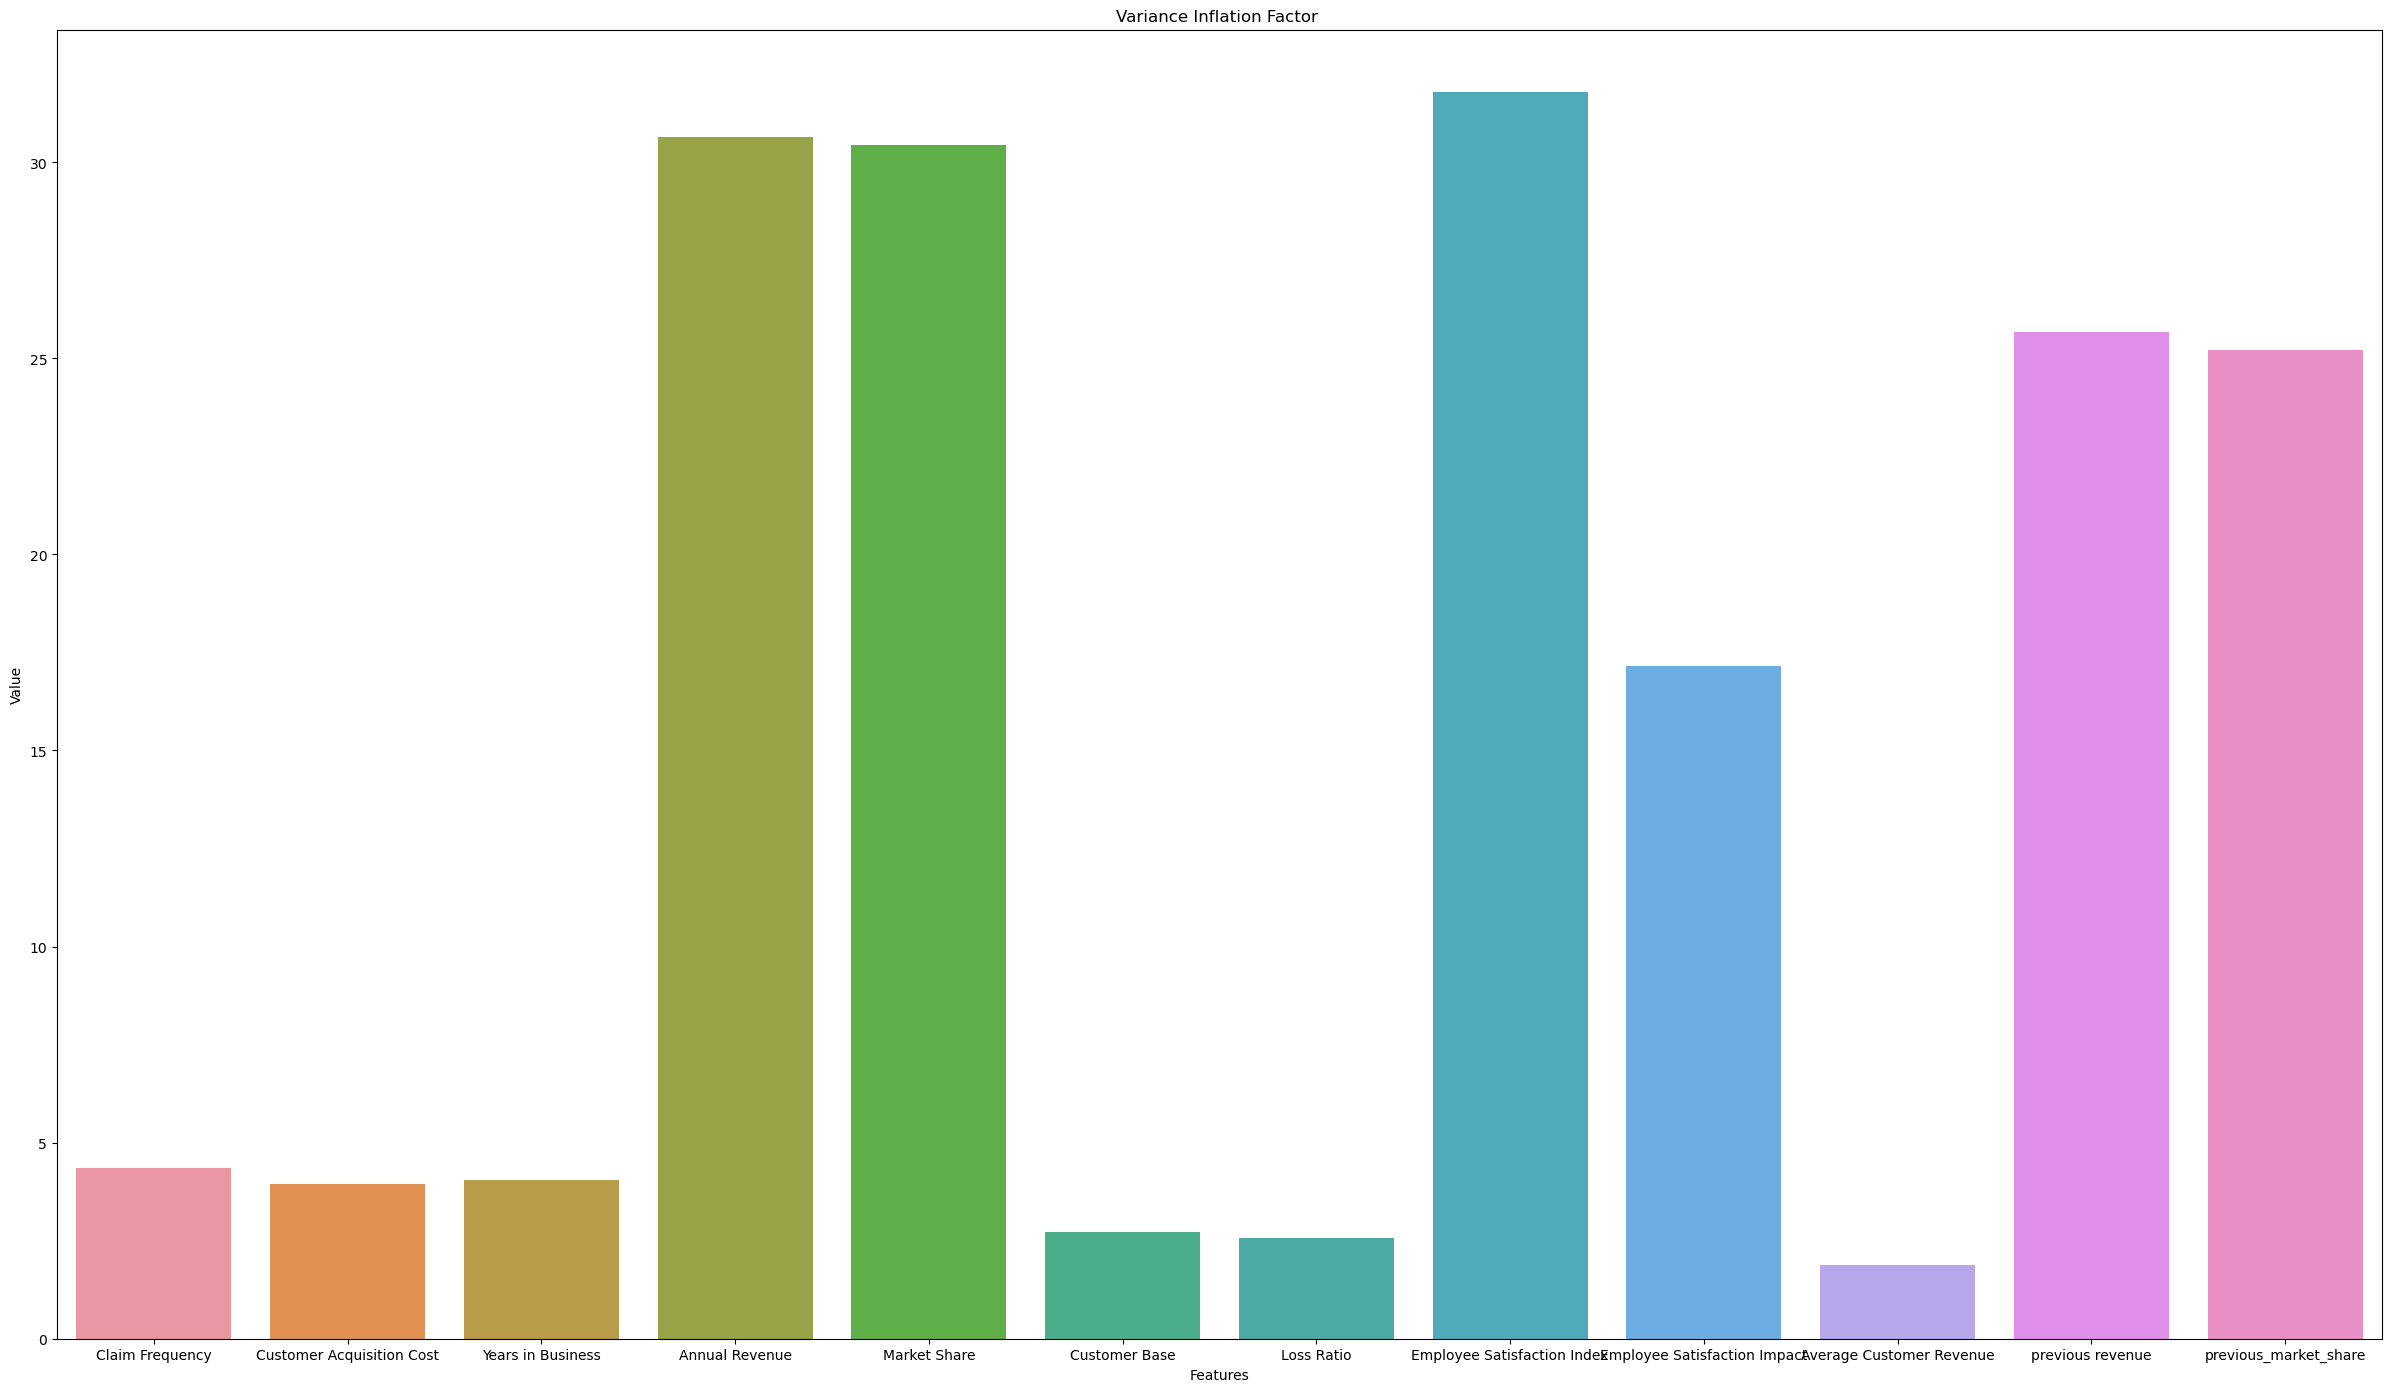

In [6]:
df1=VIF_features_selection(df,18)

In [7]:
scaler = StandardScaler()
scaled_data =scaler.fit_transform(df1)

## "Clustering Criteria for Insurance Agencies"
    
   "Clustering Criteria for Insurance Agencies" outlines a set of parameters designed to group insurance agencies based on key performance indicators. These criteria aim to facilitate the development of a recommendation system by categorizing agencies according to their operational efficiency, financial stability, and customer satisfaction metrics.








## Feature : Financial Solidity

### Low Claim Frequency:

   * Prefer clusters where insurance agencies have a lower frequency of claims. This indicates that they have fewer incidents of insurance claims, which may be indicative of better risk management or customer satisfaction.

### Low Customer Acquisition Cost:

   * Prioritize clusters where insurance agencies have lower customer acquisition costs. Lower acquisition costs may suggest efficient marketing strategies or strong brand recognition.
    
### Higher Years in Business:

   * Favor clusters where insurance agencies have been in business for a longer duration. Longer tenure may indicate stability, experience, and trustworthiness in the industry.
    
### Higher Customer Base:

   * Prefer clusters with insurance agencies that have a larger customer base. A larger customer base may signify market dominance, customer satisfaction, or effective sales strategies.
    
### Lower Loss Ratio:

   * Prioritize clusters where insurance agencies have a lower loss ratio. A lower loss ratio indicates that the agency is effectively managing risks and minimizing losses, which is essential for financial stability.
        
### Higher Employee Satisfaction Impact:

   * Favor clusters where insurance agencies have a higher impact on employee satisfaction. High employee satisfaction can lead to better customer service, higher productivity, and lower turnover rates.
    
### Higher Average Customer Revenue:

   * Prefer clusters with insurance agencies that generate higher average customer revenue. Higher revenue per customer may indicate better product offerings, higher premiums, or cross-selling opportunities.
    

updated
Cluster : 2  in process....
Cluster : 3  in process....
Cluster : 4  in process....
Cluster : 5  in process....
Cluster : 6  in process....
Cluster : 7  in process....
Cluster : 8  in process....
Cluster : 9  in process....


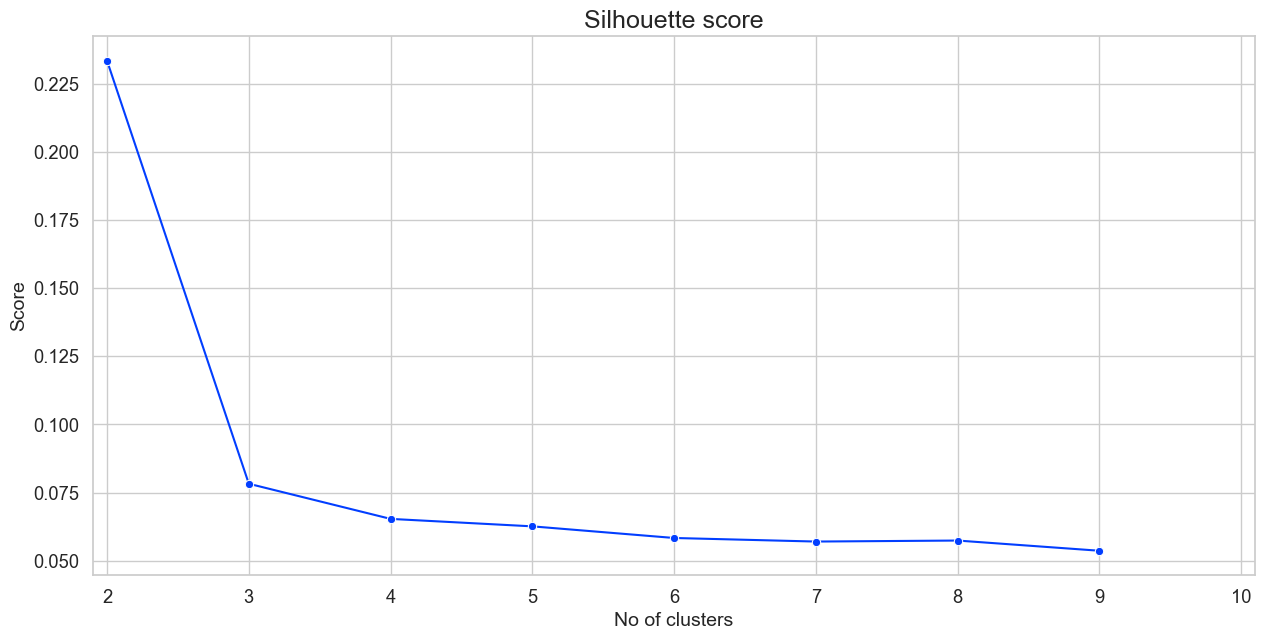

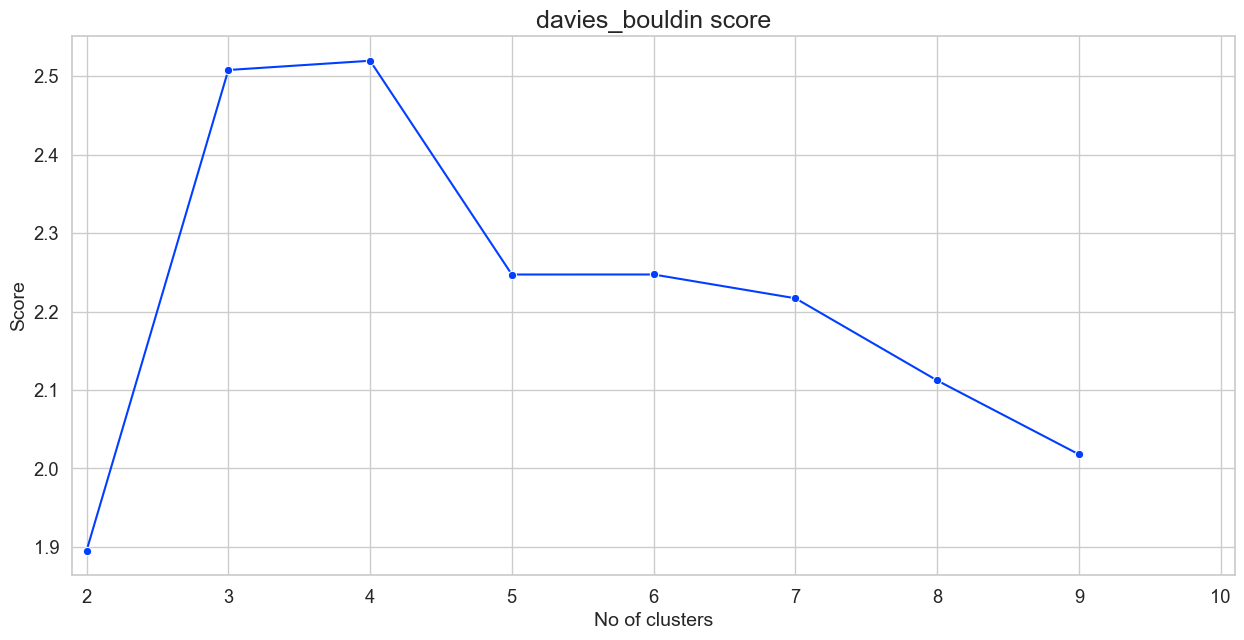

In [9]:
model =AgglomerativeClustering(linkage='ward',compute_full_tree=True)
ideal_model=Hiearchical_clustering(model,10,scaled_data)

In [10]:
from functions import display_parallel_coordinates_centroids,display_factorial_planes,display_circles
from numpy import unique
def visualization_violin(df,target_feature="clusters"):
    
    liste_column=list(df.columns)
    liste_column.remove(target_feature)
    f, ax = plt.subplots(figsize=(14, 10))
    for element in liste_column :

        ax=sns.violinplot(x=target_feature, y=element, data=df, palette="Set3")
        sns.despine(left=True)

        plt.show()



def Visualization_coordination(best_centroids,df):
    centroids = pd.DataFrame(best_centroids, columns=df.columns)


    centroids['cluster'] = centroids.index

    display_parallel_coordinates_centroids(centroids, len(unique(clusters)))

    
def plot_pca(pca,df,X_reduced,centroids,clusters):
    
    print('Variance Explained by PCA Projection =',np.sum(pca.explained_variance_ratio_))
    
    # Plot points distribution and Cervle of colleration of each Feature 
    pcs = pca.components_ 
    centres_reduced = pca.transform(best_centroids)
    plt.figure(figsize=(15, 7))
    
    display_factorial_planes(X_reduced, 3, pca, [(0,1)], illustrative_var = clusters, alpha = 0.8)
    plt.scatter(centres_reduced[:, 0], centres_reduced[:, 1],
            marker='x', s=169, linewidths=3,
            color='r', zorder=10)
    plt.figure(figsize=(15, 7))

    
    display_circles(pcs, 3, pca, [(0,1)], labels = np.array(df.columns),)
    
    print('                    ****************************                      ')
    
    
    plt.figure(figsize=(15, 7))

    display_factorial_planes(X_reduced, 3, pca, [(0,2)], illustrative_var = clusters, alpha = 0.8)
    
    plt.scatter(centres_reduced[:, 0], centres_reduced[:, 2],
            marker='x', s=169, linewidths=3,
            color='r', zorder=10)
    
    
    plt.figure(figsize=(15, 7))

    display_circles(pcs, 3, pca, [(0,2)], labels = np.array(df.columns),)
    
    print('                    ****************************                      ')
    
    plt.figure(figsize=(15, 7))

    display_factorial_planes(X_reduced, 3, pca, [(1,2)], illustrative_var = clusters, alpha = 0.8)
    
    plt.scatter(centres_reduced[:, 1], centres_reduced[:, 2],
            marker='x', s=169, linewidths=3,
            color='r', zorder=10)
    
    plt.figure(figsize=(15, 7))

    display_circles(pcs, 3, pca, [(1,2)], labels = np.array(df.columns),)
    
    
    
def Visualization_results(scaled_data,df,best_centroids,clusters):
    
    X_clustered=pd.DataFrame(scaled_data,columns=df.columns)
    X_clustered['clusters']=clusters
    print('                    ****************************                      ')

    print('            Visualization of Boxplot               ')
    X_clustered.boxplot(by="clusters", figsize=(15,15), layout=(2,5))
    plt.show()
    print('                    ****************************                      ')
   
    print('            Visualization of Violin               ')
    visualization_violin(X_clustered)
    
    print('            Visualization of PCA Projection               ')
    
    pca = PCA(n_components=3)
    X_reduced = pca.fit_transform(scaled_data)
    plot_pca(pca,df,X_reduced,best_centroids,clusters)
    
    print('            Visualization of Coordination Chart               ')
    Visualization_coordination(best_centroids,df)


In [12]:
model =AgglomerativeClustering(linkage='ward',compute_full_tree=True)
model.set_params(n_clusters=3)

clusters=model.fit_predict(scaled_data)
# Add the cluster number to the original scaled data
X_clustered = pd.DataFrame(scaled_data, index=df1.index, columns=df1.columns)
X_clustered["cluster"] = clusters
means =  X_clustered.groupby(by="cluster").mean()
best_centroids=means.reset_index().drop(['cluster'],axis=1)

                    ****************************                      
            Visualization of Boxplot               


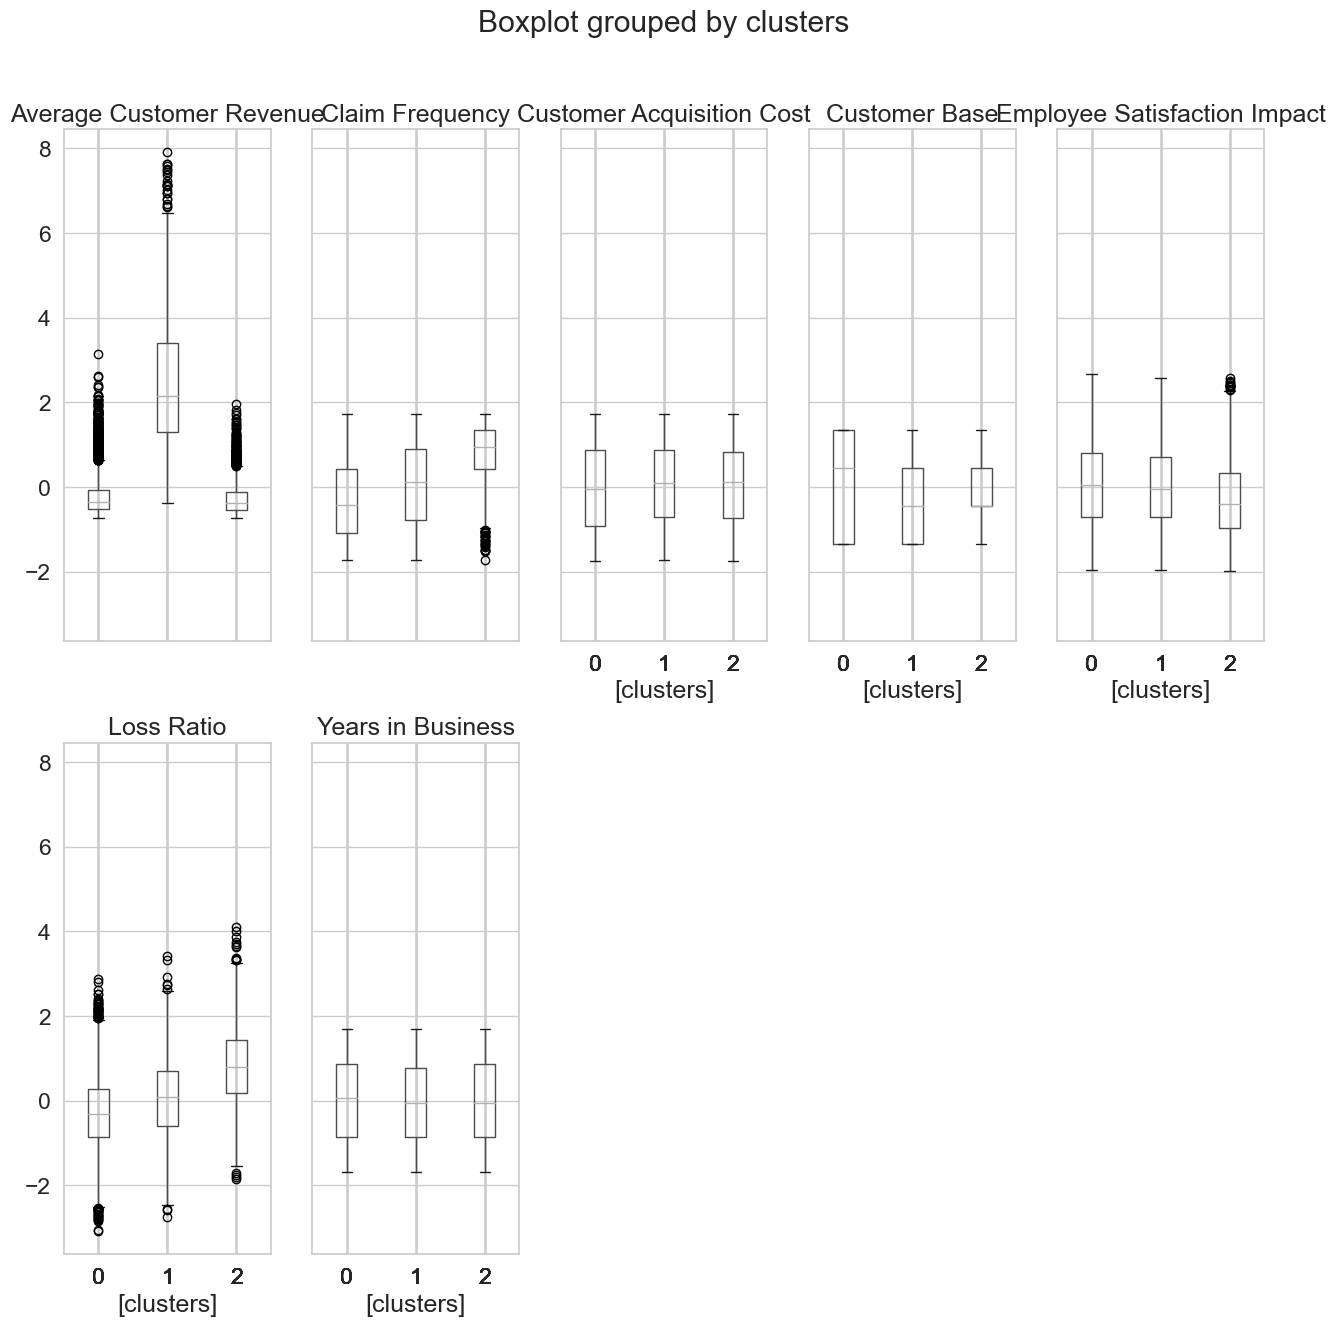

                    ****************************                      
            Visualization of Violin               


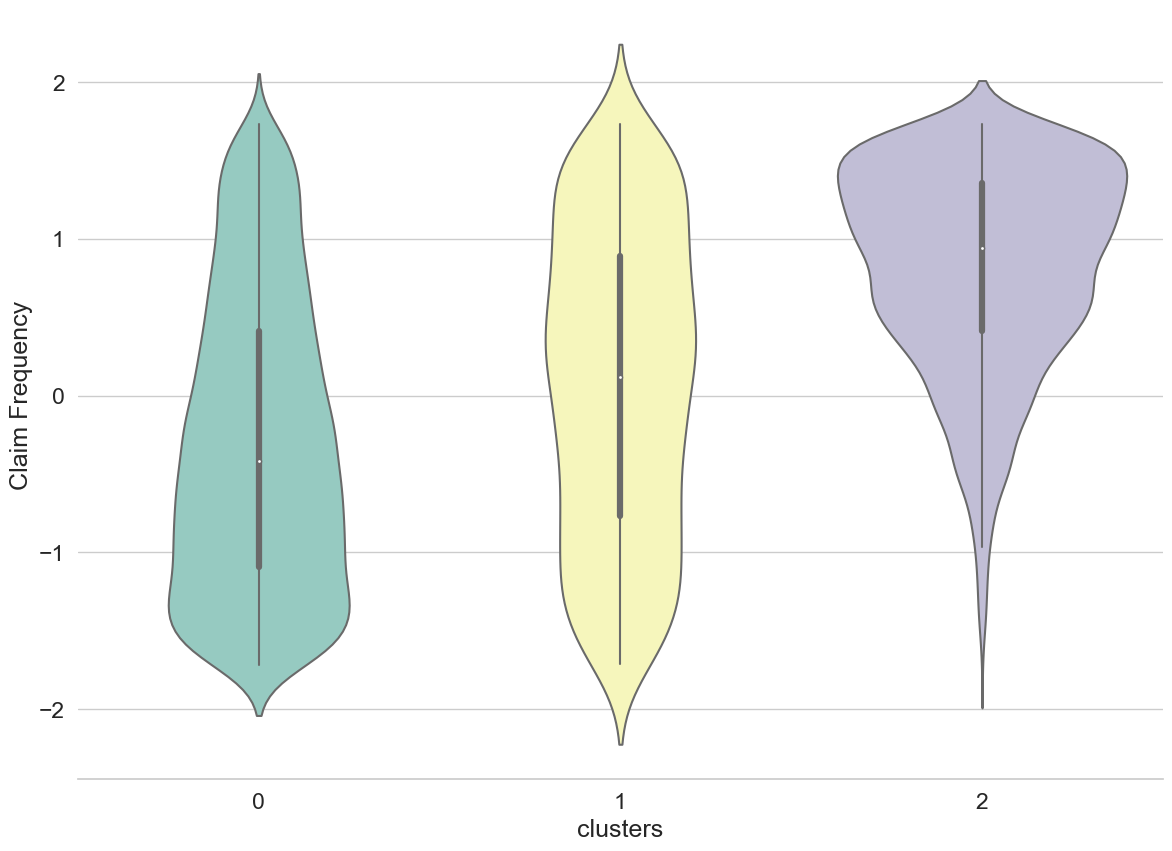

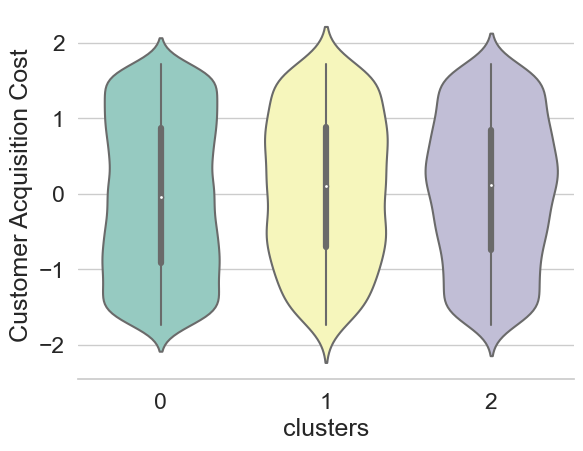

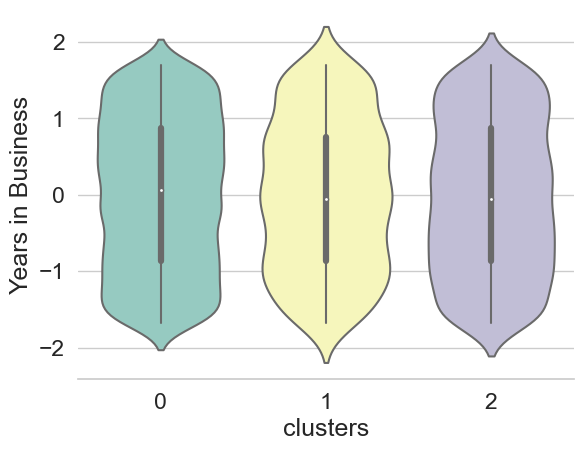

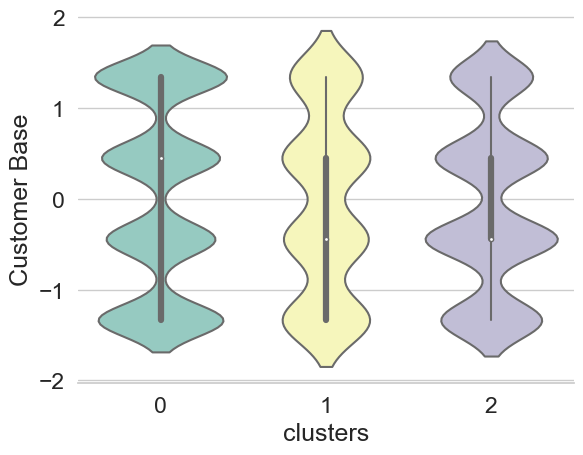

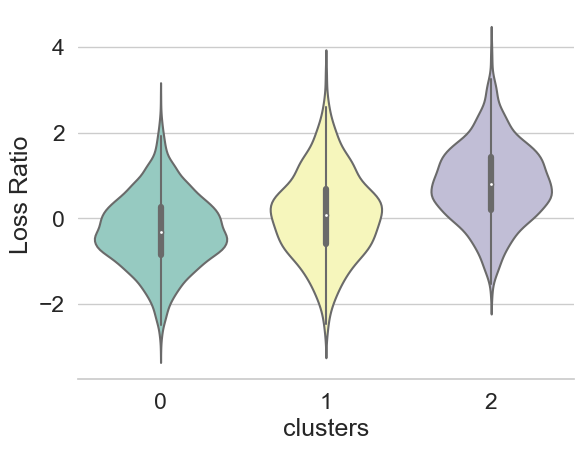

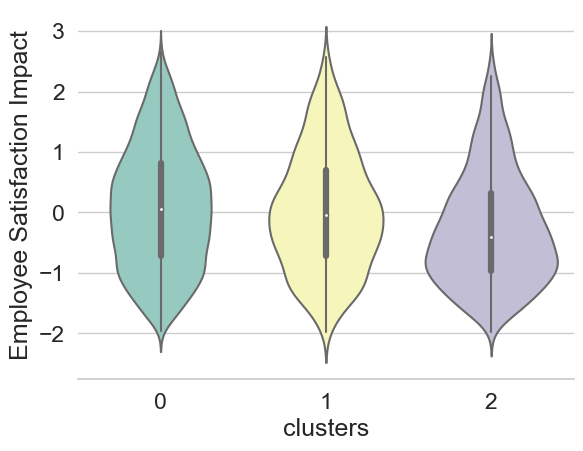

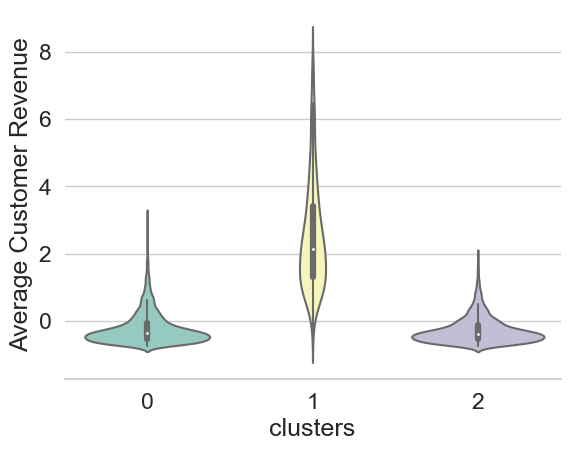

            Visualization of PCA Projection               
Variance Explained by PCA Projection = 0.48468147357033786


<Figure size 1500x700 with 0 Axes>

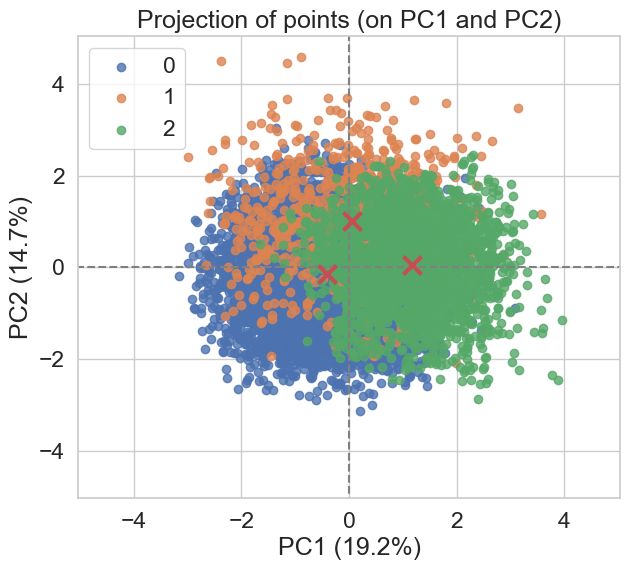

<Figure size 1500x700 with 0 Axes>

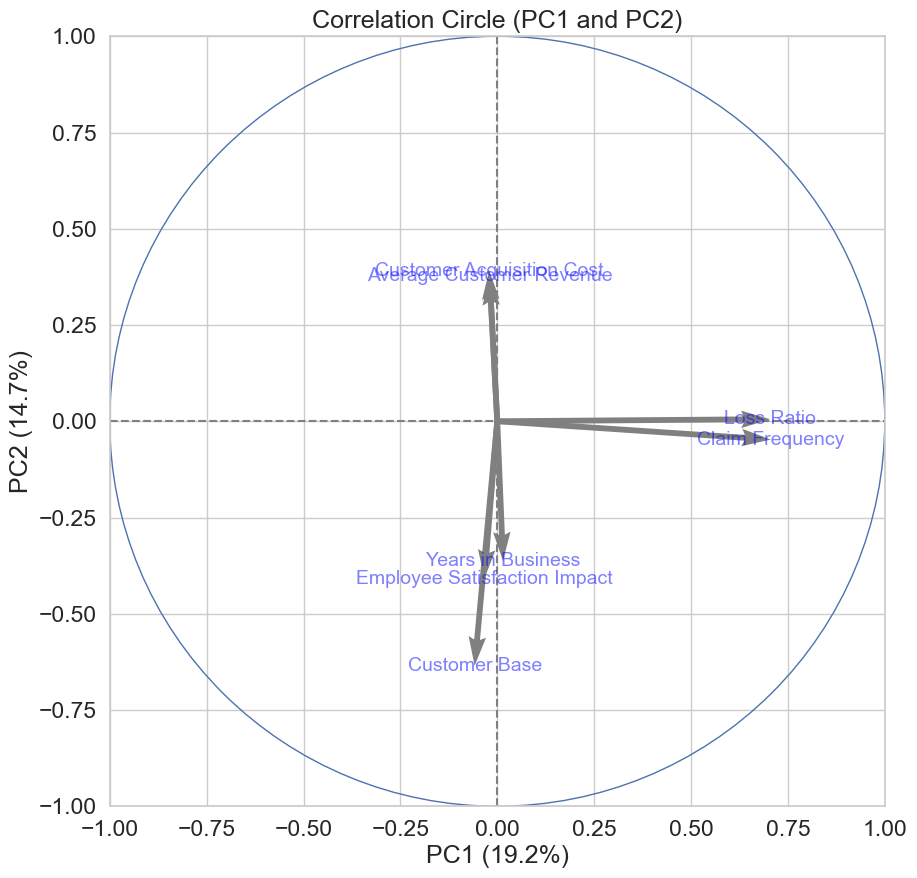

                    ****************************                      


<Figure size 1500x700 with 0 Axes>

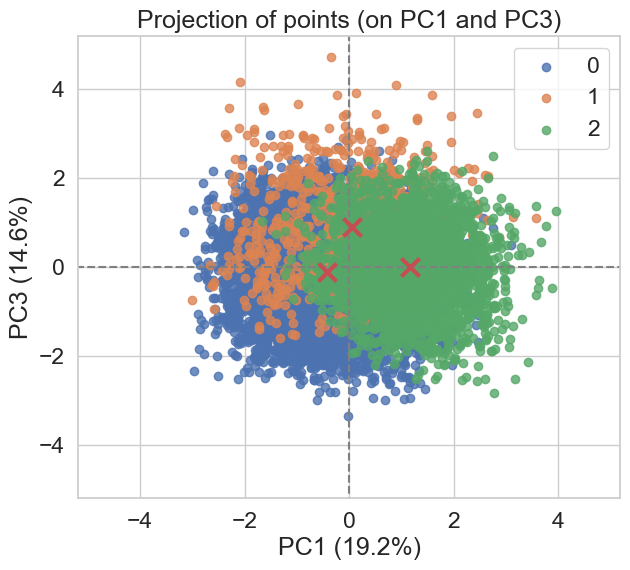

<Figure size 1500x700 with 0 Axes>

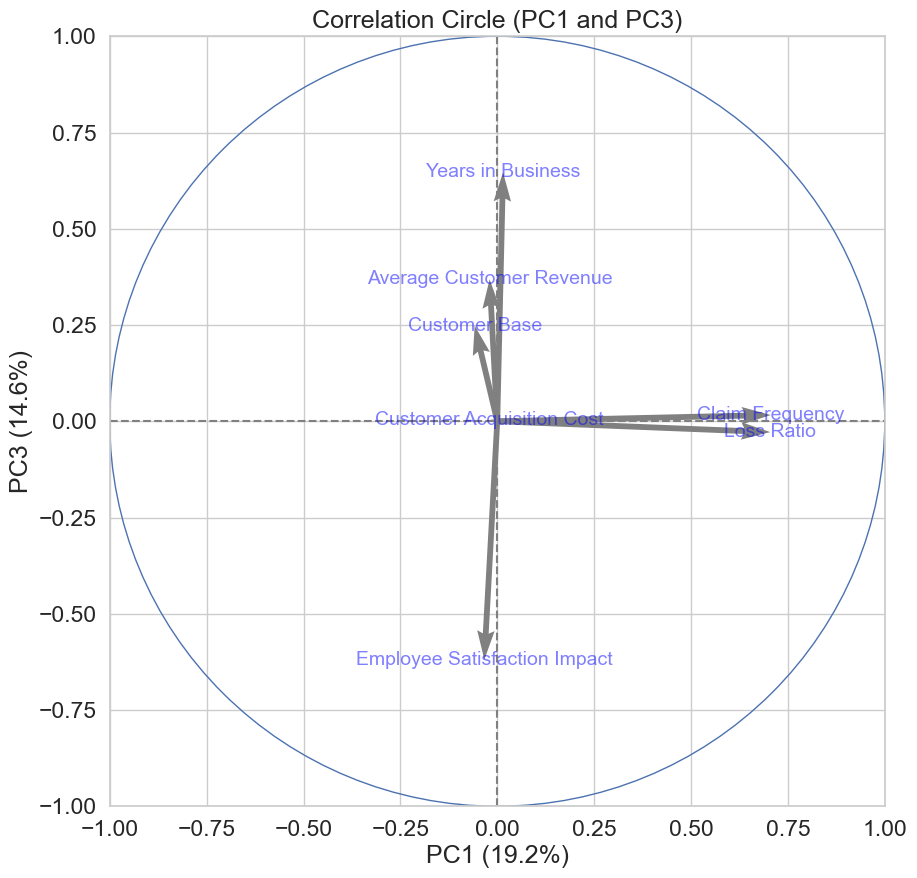

                    ****************************                      


<Figure size 1500x700 with 0 Axes>

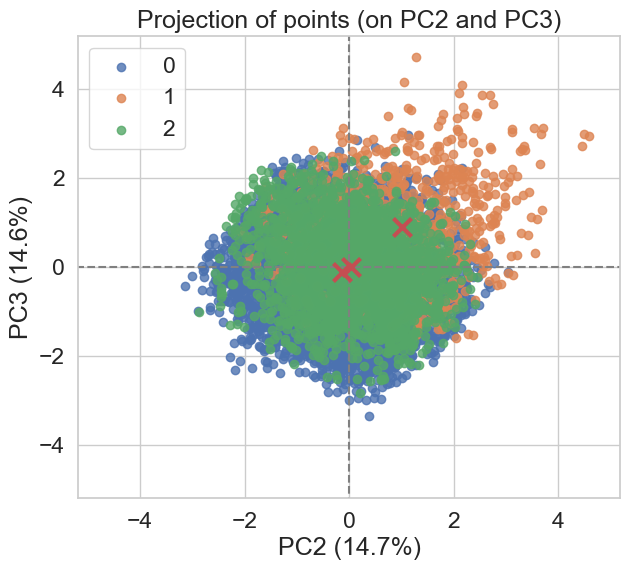

<Figure size 1500x700 with 0 Axes>

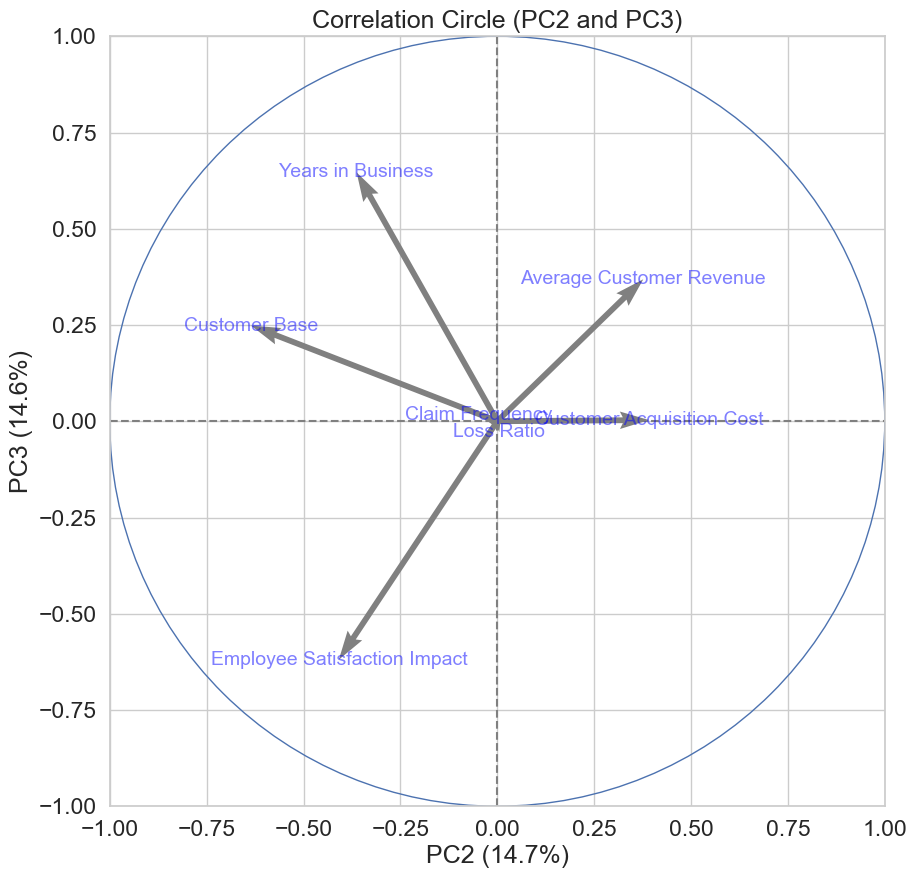

            Visualization of Coordination Chart               


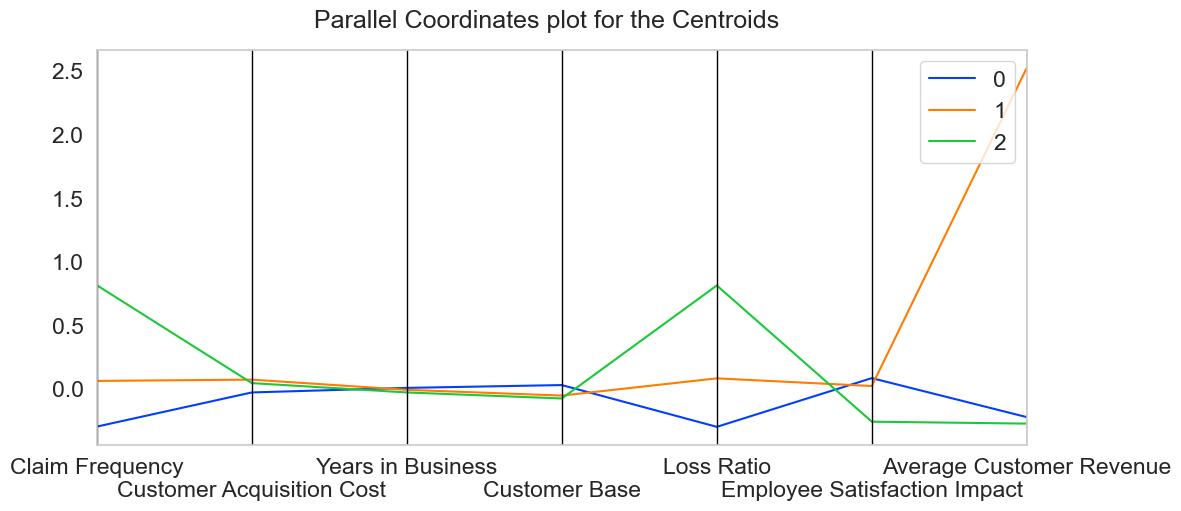

In [17]:
Visualization_results(scaled_data,df1,best_centroids,clusters)

## Observations from the boxplot chart:

#### Average Customer Revenue:

 * Across the clusters, there is a noticeable difference in the distribution of Average Customer Revenue.
 * Cluster 1 exhibits a higher mean Average Customer Revenue compared to the other clusters, indicating that agencies in this   cluster generate higher revenue per customer on average.
 
#### Claim Frequency and Loss Ratio:

 * The distribution of Claim Frequency and Loss Ratio also varies significantly across clusters.
 * Cluster 2 shows a higher mean in both Claim Frequency and Loss Ratio compared to the other clusters, suggesting that agencies in this cluster experience more frequent claims and higher loss ratios.


## Observations from the PCA projection and circle of correlation:

#### Principal Component Analysis (PCA) with Three Components:

   * By using PCA with three components, we observed that Loss Ratio and Claim Frequency have high correlation with the first principal component (Dim1).
   * This indicates that agencies with higher Loss Ratio and Claim Frequency are positioned towards the positive end of Dim1.

#### Projection of Clusters on Dim1 and Dim2:
   * When plotting the points on Dim1 and Dim2, we observed that Cluster 2 aligns with higher scores on Dim1, confirming the findings from the boxplot analysis that agencies in this cluster have higher Loss Ratio and Claim Frequency.
   
#### Projection of Clusters on Dim2 and Dim3:
* When examining the projection of clusters on Dim2 and Dim3 and considering the correlation circle, we observed that Cluster 1 tends to have higher Average Revenue.

## Observations from the coordination plot:

#### Coordination Plot Analysis:

   * The coordination plot verifies the observations made from previous analyses.
   * Both Claim Frequency and Loss Ratio exhibit a similar orderliness among clusters, with Cluster 2 having the highest centroid, followed by Cluster 1, and then Cluster 0. This aligns with the pattern identified in the boxplot analysis and PCA projection.
   * Additionally, on the dimension of Average Customer Revenue, Cluster 1 appears to have a significantly higher centroid compared to Clusters 0 and 2. This reinforces the notion that agencies in Cluster 1 generate higher average revenue per customer.



In [18]:
scaler = StandardScaler()
scaled_data =scaler.fit_transform(df1)

Cluster : 2  In process....
Cluster : 3  In process....
Cluster : 4  In process....
Cluster : 5  In process....
Cluster : 6  In process....


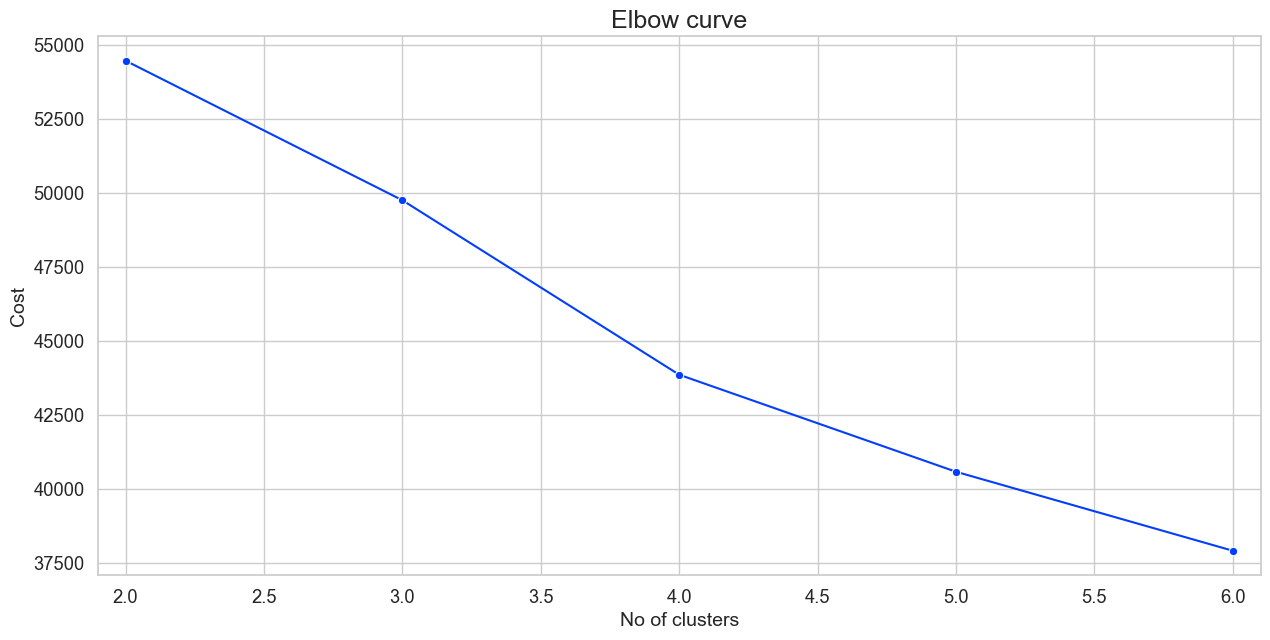

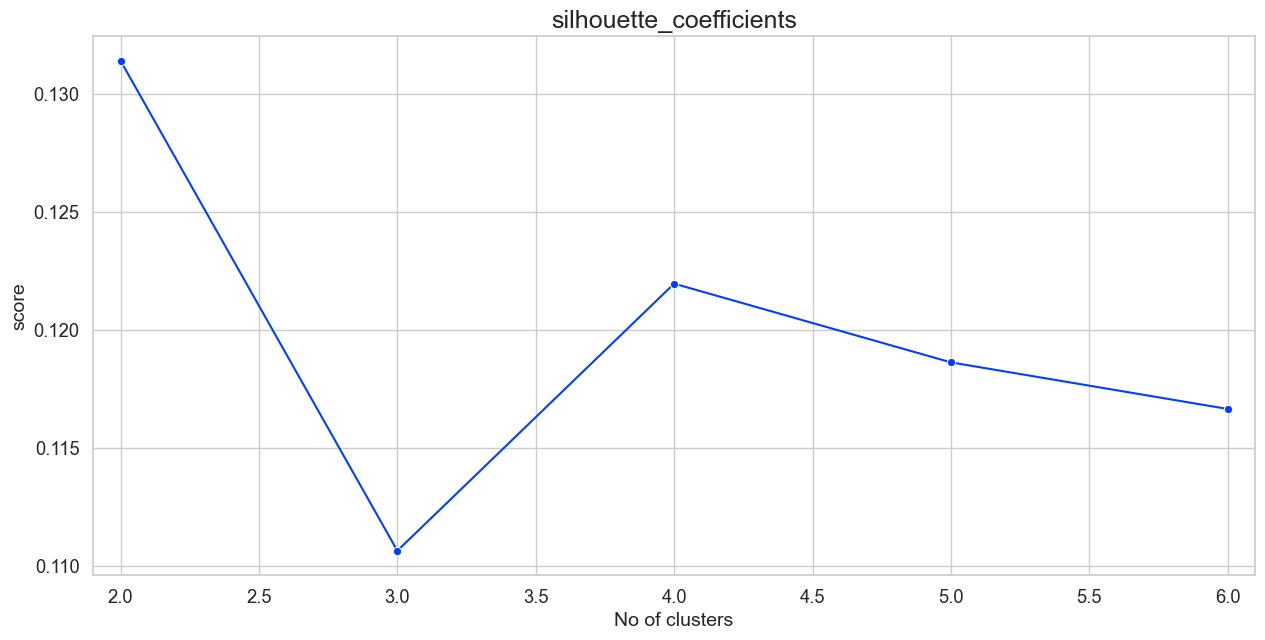

In [19]:
KPrototypes_clustering(2,6,scaled_data,[3])

In [8]:
test_model = KPrototypes(n_clusters=3, init='Huang', random_state=42,verbose=1)
clusters=test_model.fit_predict(scaled_data, categorical=[3])
best_centroids=test_model.cluster_centroids_

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 2103, ncost: 50894.37703114404
Run: 1, iteration: 2/100, moves: 1108, ncost: 50354.4876385369
Run: 1, iteration: 3/100, moves: 621, ncost: 50152.38754150531
Run: 1, iteration: 4/100, moves: 326, ncost: 50102.871875168734
Run: 1, iteration: 5/100, moves: 135, ncost: 50094.462440366624
Run: 1, iteration: 6/100, moves: 65, ncost: 50091.246743890915
Run: 1, iteration: 7/100, moves: 49, ncost: 50089.774202007604
Run: 1, iteration: 8/100, moves: 37, ncost: 50088.74239860456
Run: 1, iteration: 9/100, moves: 39, ncost: 50087.739553985375
Run: 1, iteration: 10/100, moves: 22, ncost: 50087.33521529979
Run: 1, iteration: 11/100, moves: 28, ncost: 50086.567987720104
Run: 1, iteration: 12/100, moves: 26, ncost: 50086.05387778014
Run: 1, iteration: 13/100, moves: 14, ncost: 50085.869745814154
Run: 1, iteration: 14/100, moves: 4, ncost: 50085.85458722941
Run: 1, iteration: 15/100, moves: 0

Run: 7, iteration: 17/100, moves: 4, ncost: 49769.13996585288
Run: 7, iteration: 18/100, moves: 4, ncost: 49769.07668353811
Run: 7, iteration: 19/100, moves: 1, ncost: 49769.07515682056
Run: 7, iteration: 20/100, moves: 0, ncost: 49769.07515682056
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 8, iteration: 1/100, moves: 1719, ncost: 51305.025059225016
Run: 8, iteration: 2/100, moves: 1054, ncost: 50724.23941775371
Run: 8, iteration: 3/100, moves: 676, ncost: 50475.778511802426
Run: 8, iteration: 4/100, moves: 514, ncost: 50341.13819051714
Run: 8, iteration: 5/100, moves: 349, ncost: 50270.41801099243
Run: 8, iteration: 6/100, moves: 292, ncost: 50217.13979170406
Run: 8, iteration: 7/100, moves: 329, ncost: 50140.17954150385
Run: 8, iteration: 8/100, moves: 386, ncost: 50051.41658799337
Run: 8, iteration: 9/100, moves: 391, ncost: 49960.01401481229
Run: 8, iteration: 10/100, moves: 355, ncost: 49885.09987765419
Run: 8, iteration: 11/100, moves: 281

                    ****************************                      
            Visualization of Boxplot               


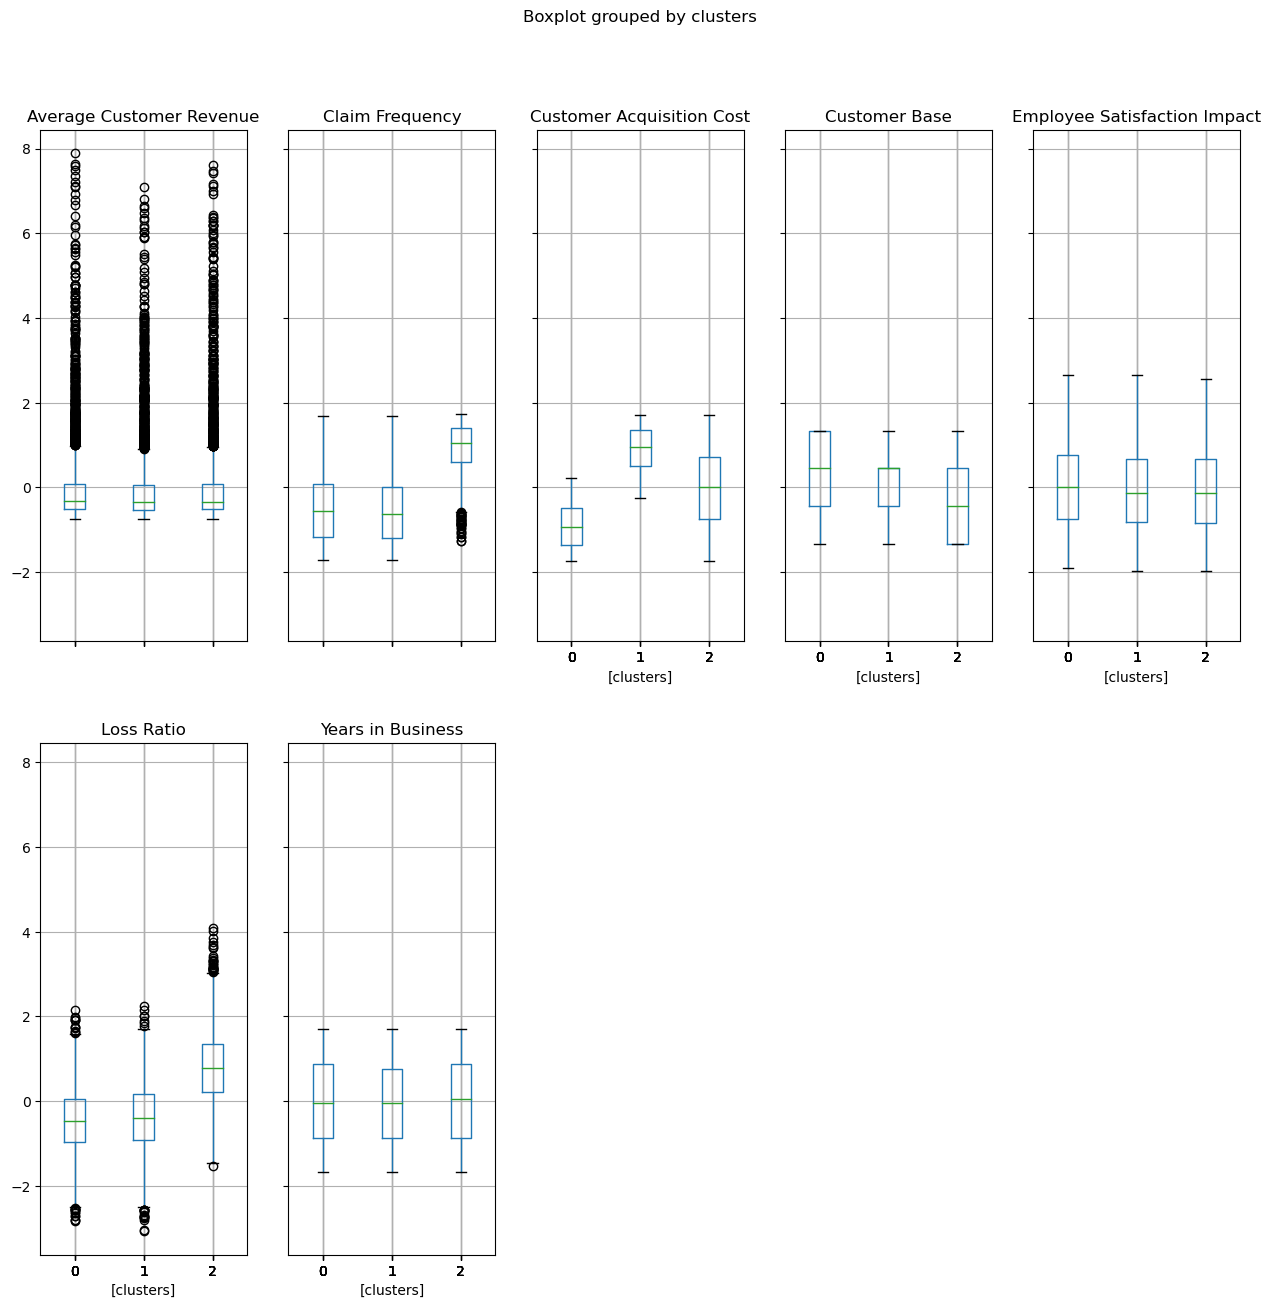

                    ****************************                      
            Visualization of Violin               


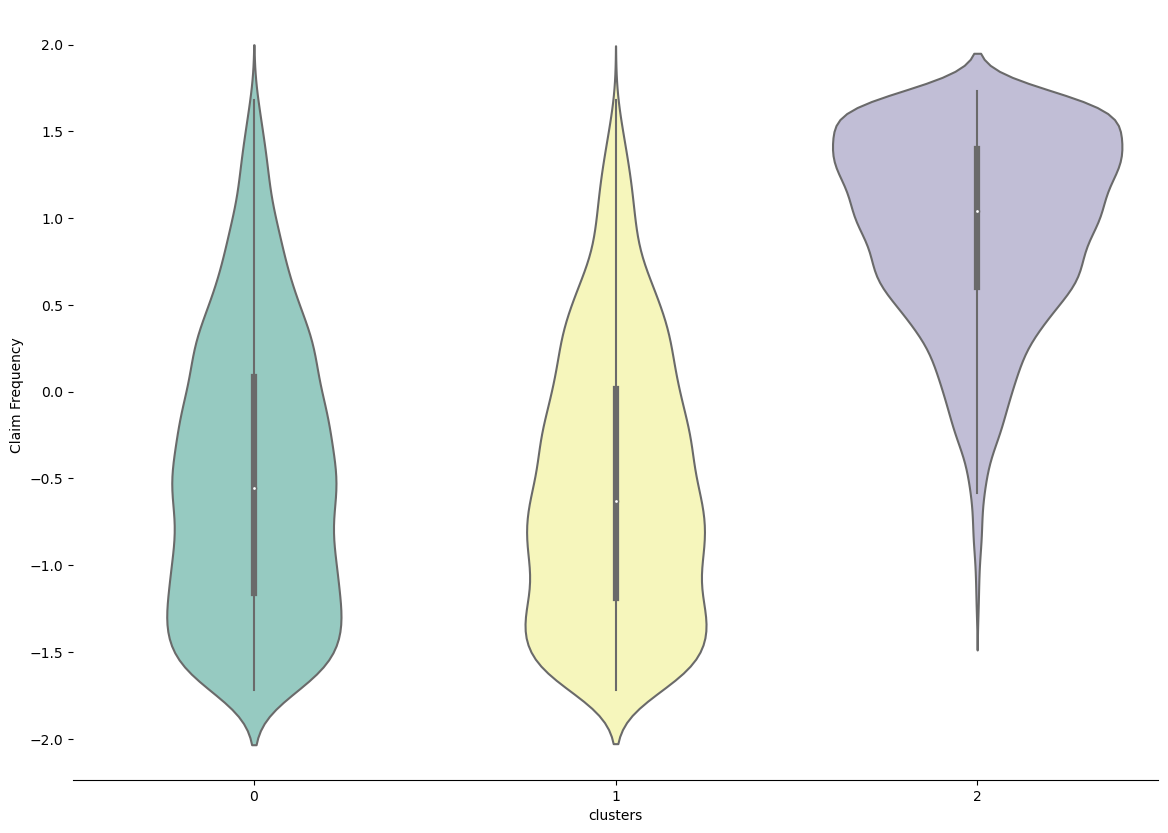

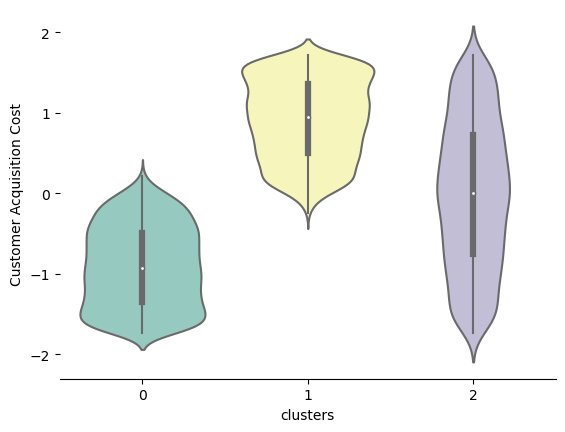

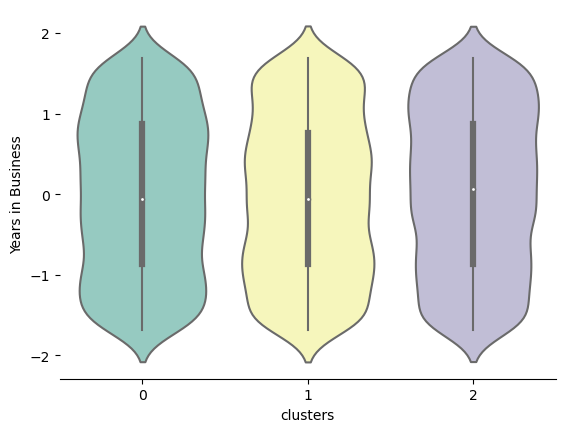

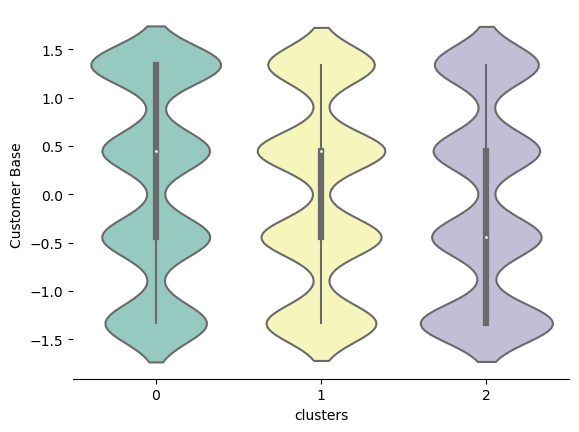

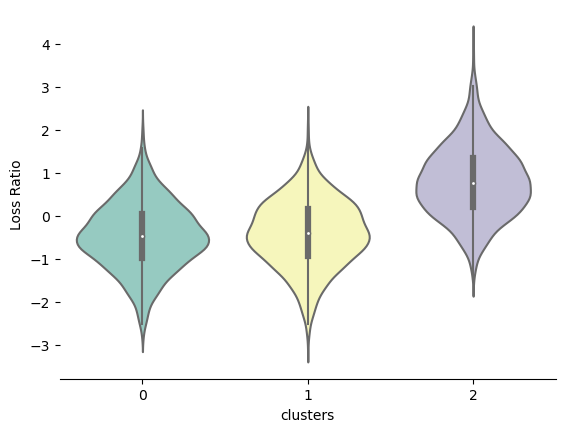

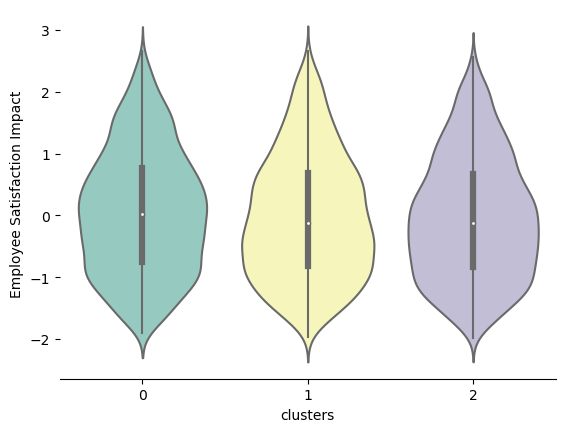

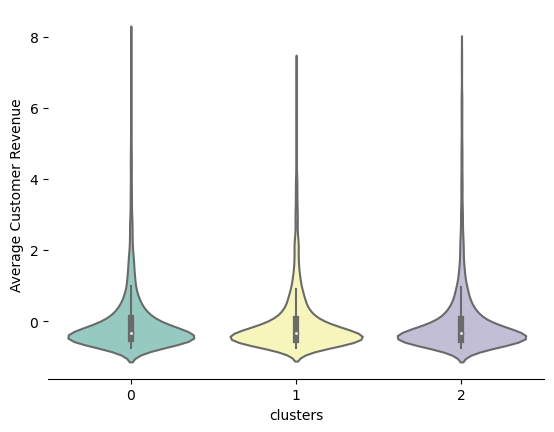

            Visualization of PCA Projection               
Variance Explained by PCA Projection = 0.48468147357033803


<Figure size 1500x700 with 0 Axes>

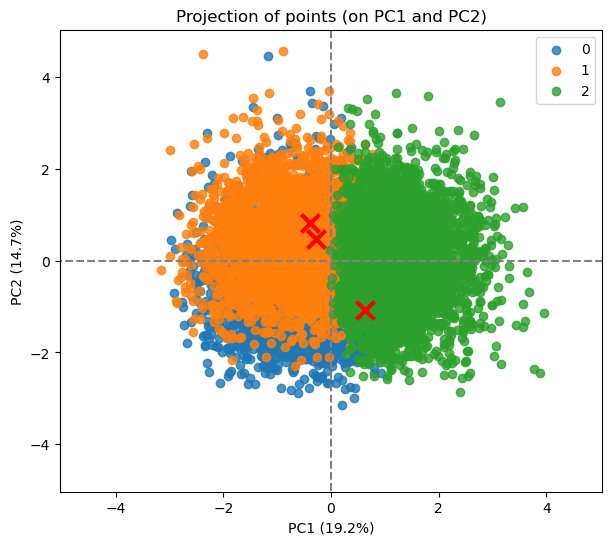

<Figure size 1500x700 with 0 Axes>

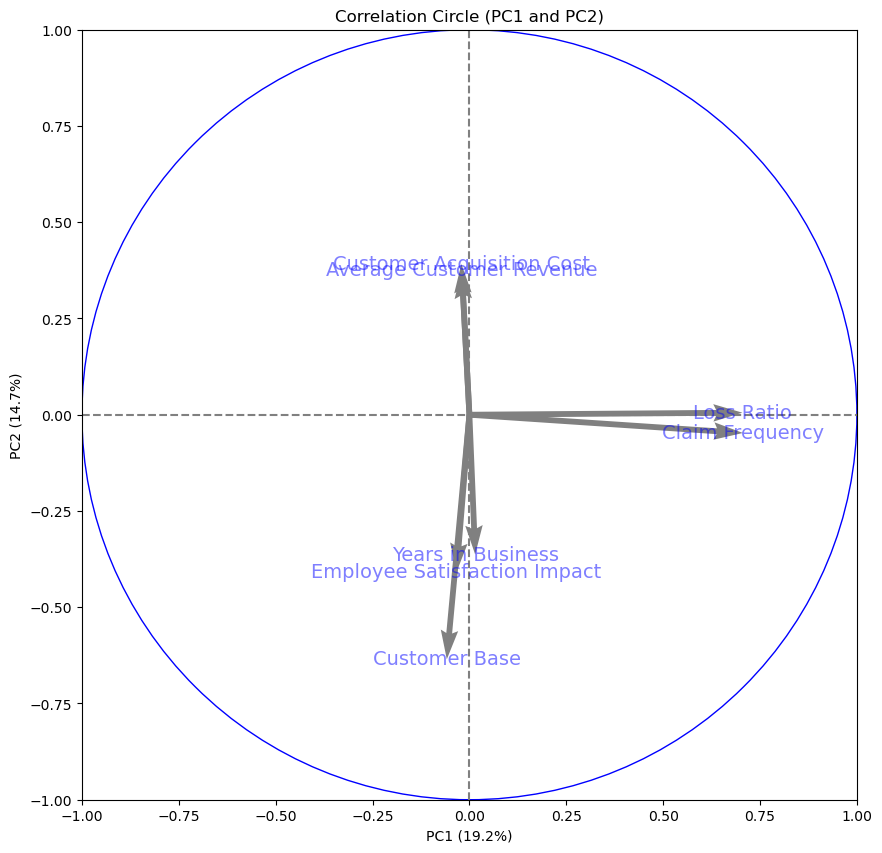

                    ****************************                      


<Figure size 1500x700 with 0 Axes>

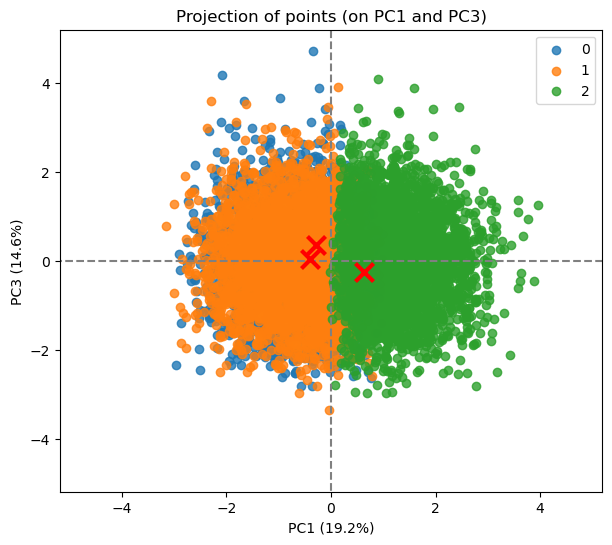

<Figure size 1500x700 with 0 Axes>

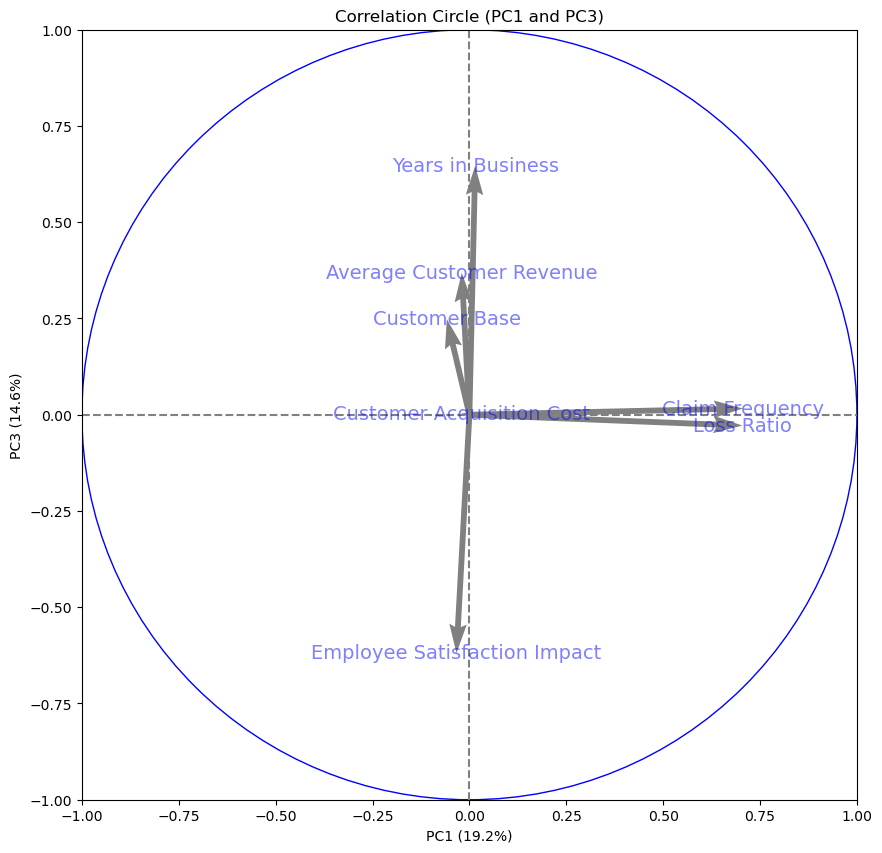

                    ****************************                      


<Figure size 1500x700 with 0 Axes>

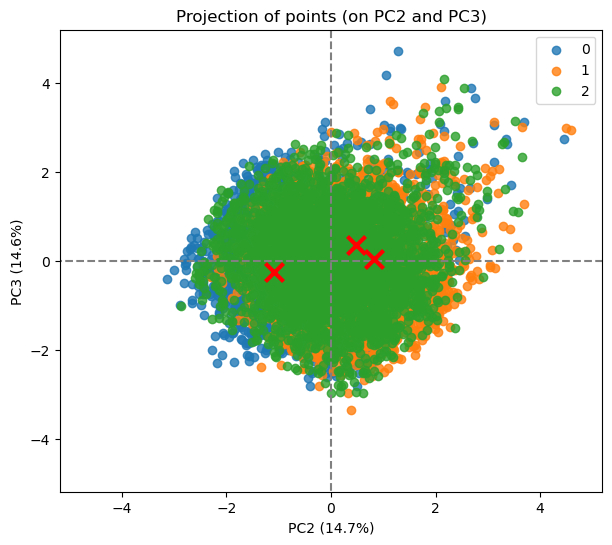

<Figure size 1500x700 with 0 Axes>

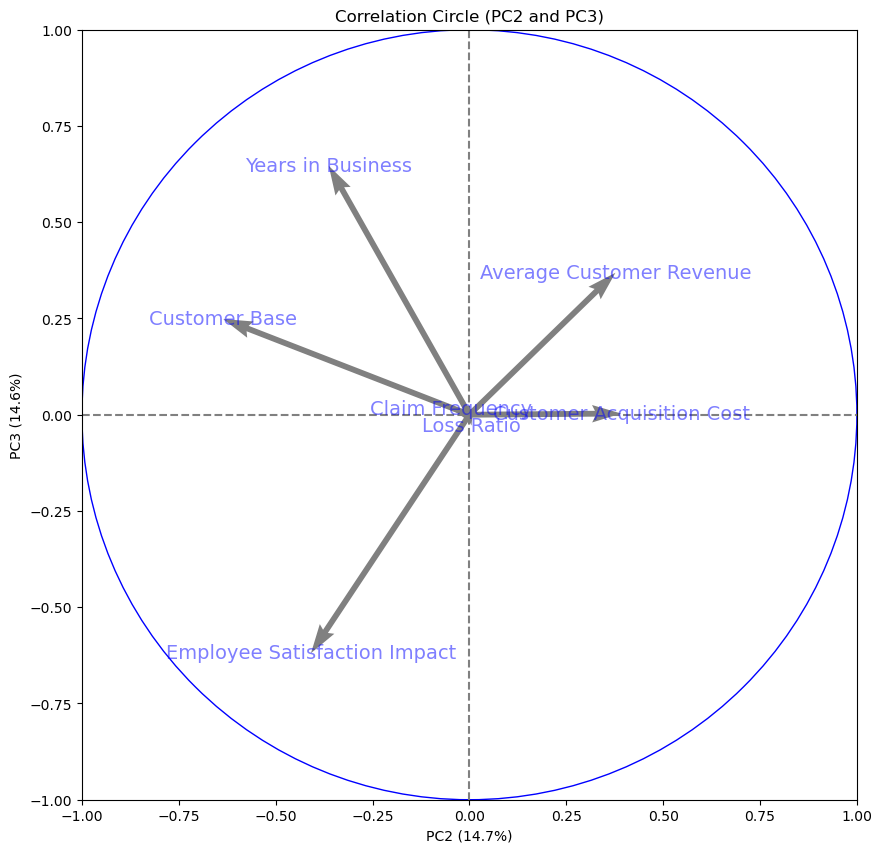

            Visualization of Coordination Chart               


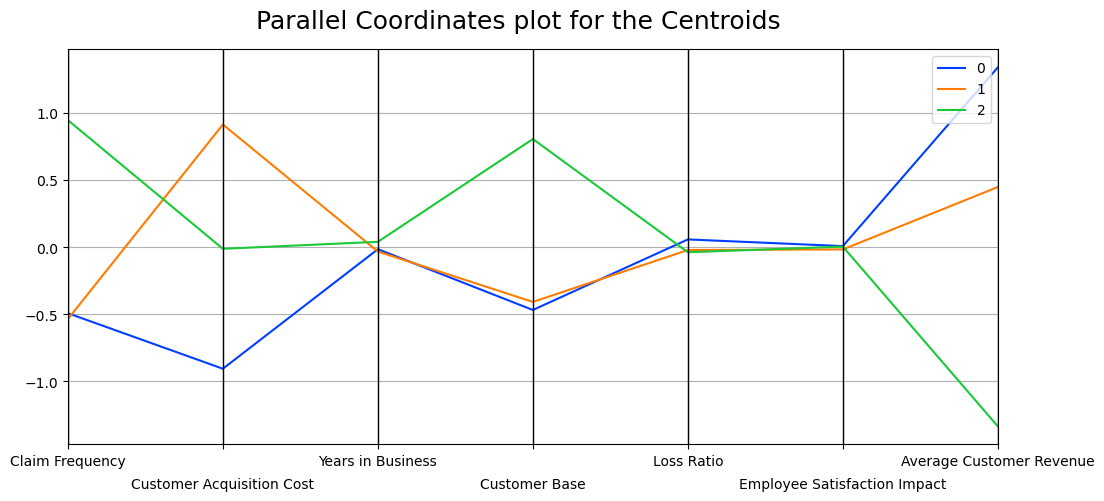

In [11]:
Visualization_results(scaled_data,df1,best_centroids,clusters)

## Observations from the boxplot chart:

   * In the K-Prototypes model, there is more variance observed in a higher number of features, including Claim Frequency, Customer Acquisition Cost, Customer Base, Loss Ratio, and Average Customer Revenue.

   * Specifically, for features such as Claim Frequency and Loss Ratio, Cluster 2 exhibits a significantly higher mean compared to the other clusters. This suggests that agencies in Cluster 2 experience a higher frequency of claims and higher loss ratios, indicating potentially higher risk profiles.

   * Additionally, for Customer Acquisition Cost, Cluster 0 scores lower, indicating that agencies in this cluster tend to have lower costs associated with acquiring new customers.

## Observations from the PCA projection and circle of correlation:

   * Loss Ratio and Claim Frequency exhibit higher correlation with Dim1, indicating their importance in differentiating clusters.
   * Cluster 2 is positioned towards the positive end of Dim1, suggesting that agencies in this cluster have higher Loss Ratio and Claim Frequency, consistent with the findings from the boxplot analysis.
   * Year of Business shows higher correlation with Dim3, but its impact on the distribution of clusters is not significant. Similarly, Employee Satisfaction Impact exhibits an inverse correlation with Dim3 but does not appear to affect the distribution of clusters.

## Observations from the coordination plot:

   * The coordination chart verifies the observations made from previous analyses.
   * Cluster 2 centroids exhibit higher values for Claim Frequency and lower values for Average Customer Revenue, indicating that agencies in this cluster experience more frequent claims but generate lower revenue per customer.
   * Cluster 0 centroids represent a favorable choice for recommendation, as they show lower centroids for both Claim Frequency and Customer Acquisition Cost, while showing higher centroids for Average Customer Revenue. This suggests that agencies in Cluster 0 have lower costs associated with acquiring customers and generate higher revenue per customer.
   * Cluster 1 represents a moderate choice between the extremes of Clusters 0 and 2, with centroids showing moderate values for both Claim Frequency and Average Customer Revenue.


## Comparative Analysis of Clustering Methods

   * In conclusion, the K-Prototypes clustering method has demonstrated its effectiveness in providing a more coherent and orderly clustering solution that aligns with our initial proposals and preferences. By incorporating both numerical and categorical features, K-Prototypes offered a better fit for our clustering objectives, allowing us to identify distinct clusters of insurance agencies based on key financial metrics and operational characteristics. The analysis of the clusters using boxplots, PCA projection, and coordination charts provided valuable insights into the financial solidity and risk profiles of the agencies within each cluster. Overall, the K-Prototypes clustering approach has proven to be a valuable tool for segmentation and recommendation purposes in the insurance industry.

In [12]:
df1['Financial_solidity']=clusters

## Clusters Interpretation :

### Cluster 0 :

   * Cost Efficiency: Agencies in this cluster have lower costs associated with acquiring customers and generate higher revenue per customer. This suggests that they are operating efficiently and are able to generate significant revenue from each customer without incurring high acquisition costs.
   * Profitability: Higher revenue per customer indicates that these agencies are likely more profitable compared to others.
   * Competitive Advantage: Their ability to generate higher revenue per customer while keeping acquisition costs low gives them a competitive edge in the market. They are positioned to attract and retain customers effectively.
   
### Cluster 1 :

   * Balanced Offering: Agencies in this cluster strike a balance between claim frequency and revenue per customer. They may appeal to customers seeking a middle-ground option, offering moderate claim frequency and revenue levels.
   * Market Positioning: While not excelling in any particular metric, they may target a broad segment of the market and cater to customers with diverse needs. Their moderate performance may position them as reliable and dependable choices.
   * Competitive Advantage: While Cluster 1 represents a moderate choice, it may lack a clear competitive advantage compared to Clusters 0 . This could pose challenges in differentiating itself in the market.

### Cluster 2 :

* Profitability Per Customer: Lower revenue per customer may indicate lower profitability on a per-customer basis. While higher claim frequency can lead to increased volume of business, it may not necessarily translate to higher overall profitability if margins are thin.
    

In [13]:
df =pd.read_excel("insurance_compagies_4.xlsx")

Financial_dynamics =['Types of Risk Accepted','Profitability','Market Penetration','ESG Score','Revenue Growth Rate','Annual Revenue']
df2=df[Financial_dynamics]
df2.head()

Types of Risk Accepted  Profitability  Market Penetration  ESG Score  \
0          Comprehensive           0.30                6.48       2.47   
1          Comprehensive           0.45               95.61       1.50   
2              Selective           0.36               35.53       1.51   
3          Comprehensive           0.33               92.94       1.12   
4          Comprehensive           0.46               29.61       1.24   

   Revenue Growth Rate  Annual Revenue  
0            12.915856      5237609.72  
1            31.561627      2927741.24  
2            89.980102      4765583.18  
3            11.612488      1907349.00  
4             6.073955      2522869.44

In [14]:
Risk_Accepted_mapping = {'Comprehensive': 0,
                'Selective': 1          
                }

df2['Types of Risk Accepted']=df2['Types of Risk Accepted'].map(Risk_Accepted_mapping)

*******************
VIF Score lower than  18
   VIF Factor                features
0    1.926473  Types of Risk Accepted
1    5.670369           Profitability
2    3.529205      Market Penetration
3    5.727783               ESG Score
4    3.553255     Revenue Growth Rate
5    4.536800          Annual Revenue
*******************
VIF Score higher than  18
Empty DataFrame
Columns: [VIF Factor, features]
Index: []


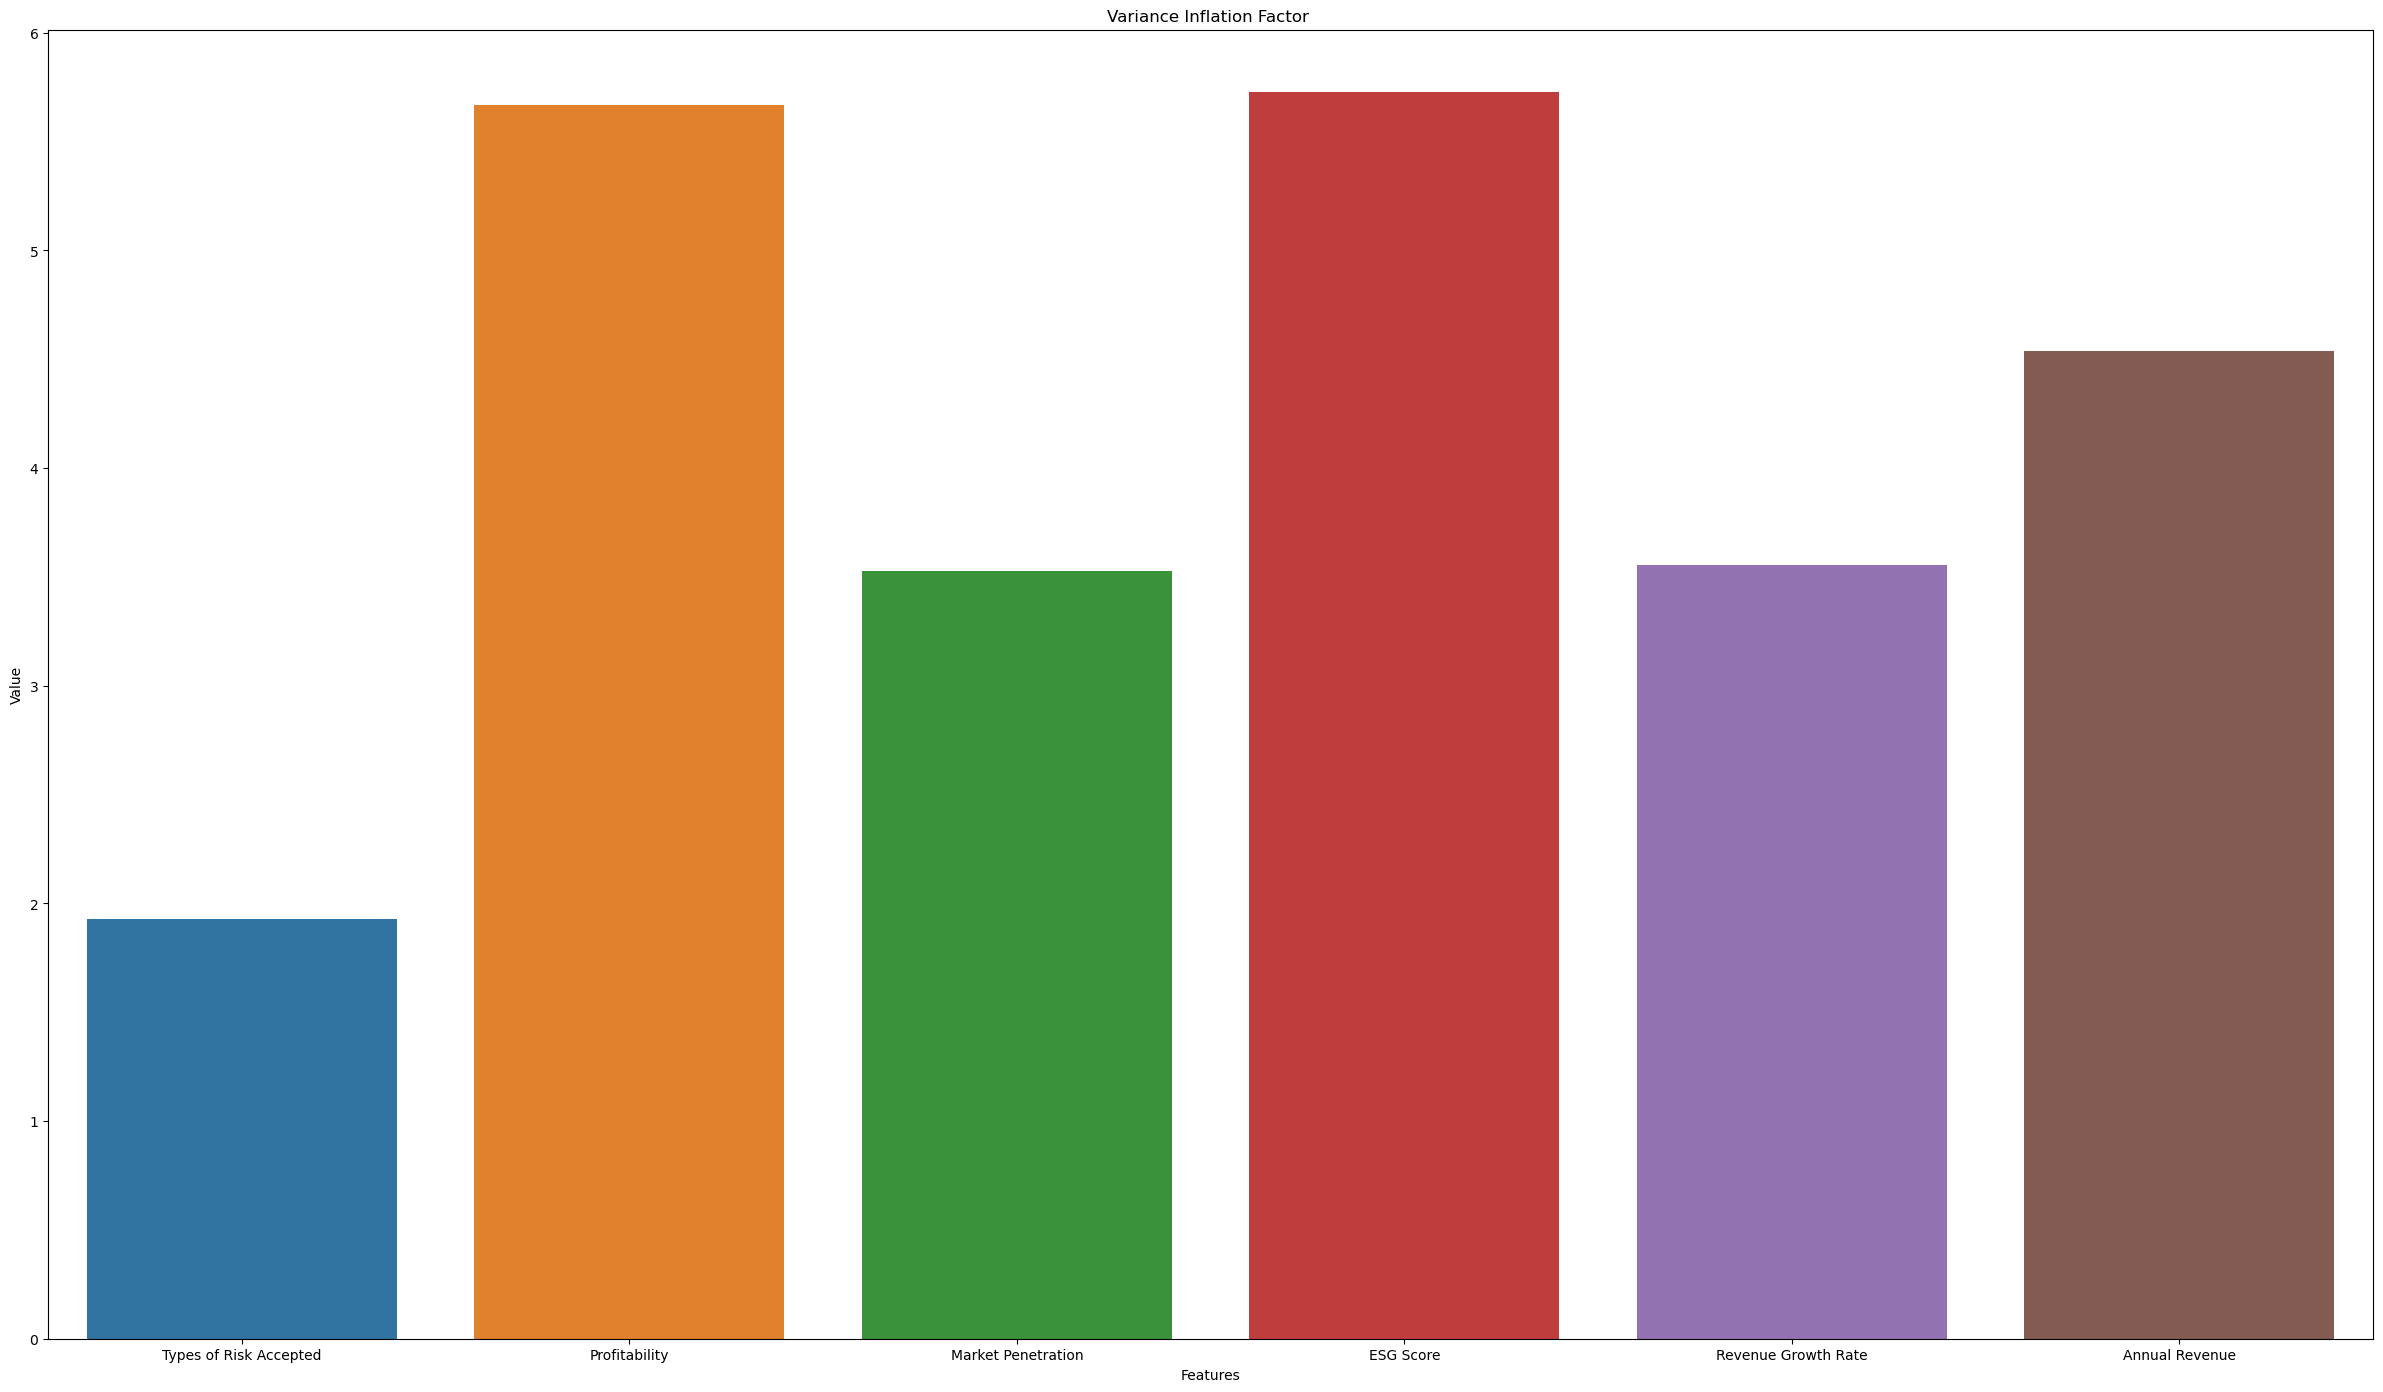

In [15]:
df2=VIF_features_selection(df2,18)

### High Profitability:

   * Prioritize clusters where insurance agencies exhibit high profitability. High profitability indicates strong financial performance and efficient management of resources.
    

### No Specific Expectation for Market Penetration:

   * Consider clusters where market penetration varies across insurance agencies. Market penetration may not be a critical indicator of profitability, and therefore, no specific expectation is set for this criterion.


### No Specific Expectation for ESG Score:

   * Do not set a specific expectation for the Environmental, Social, and Governance (ESG) score. The ESG score may vary among insurance agencies, and its impact on profitability may not be as significant as other factors.


### High Revenue Growth Rate:

   * Favor clusters with insurance agencies experiencing high revenue growth rates. A high revenue growth rate indicates expanding business opportunities and potential for future profitability.


### High Annual Revenue:

   * Prefer clusters with insurance agencies generating high annual revenues. High annual revenue reflects the scale of operations and market presence, which can contribute to overall financial stability and profitability.

In [16]:
scaler = StandardScaler()
scaled_data =scaler.fit_transform(df2)

updated
Cluster : 2  in process....
Cluster : 3  in process....
Cluster : 4  in process....
Cluster : 5  in process....
Cluster : 6  in process....
Cluster : 7  in process....
Cluster : 8  in process....
Cluster : 9  in process....


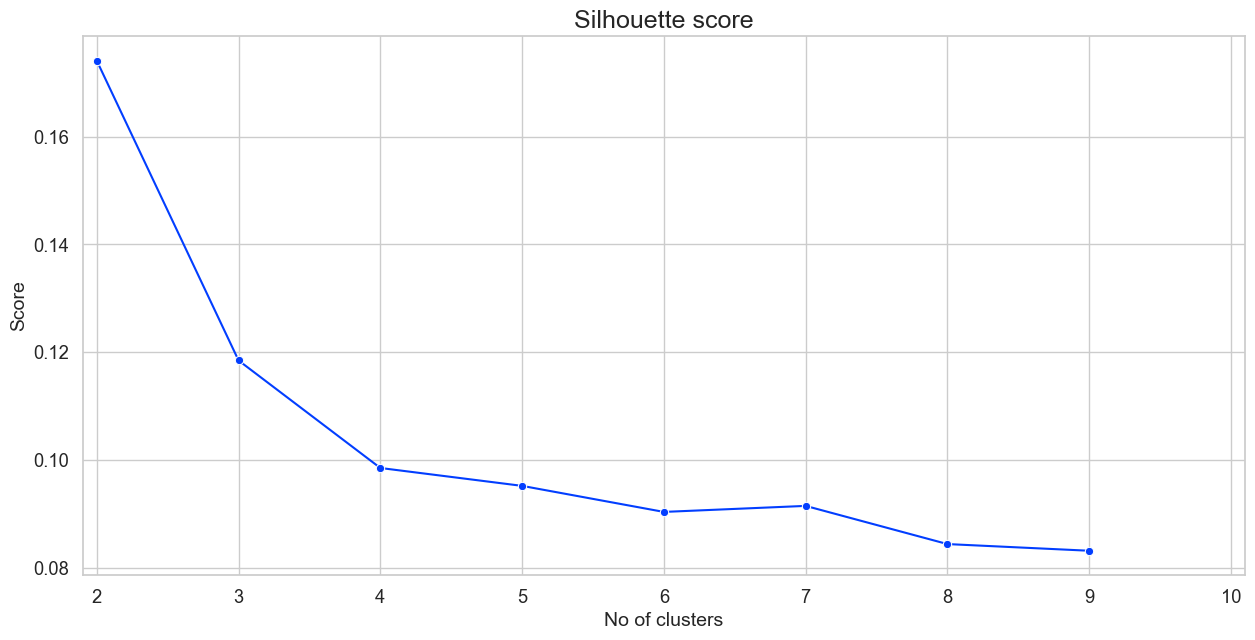

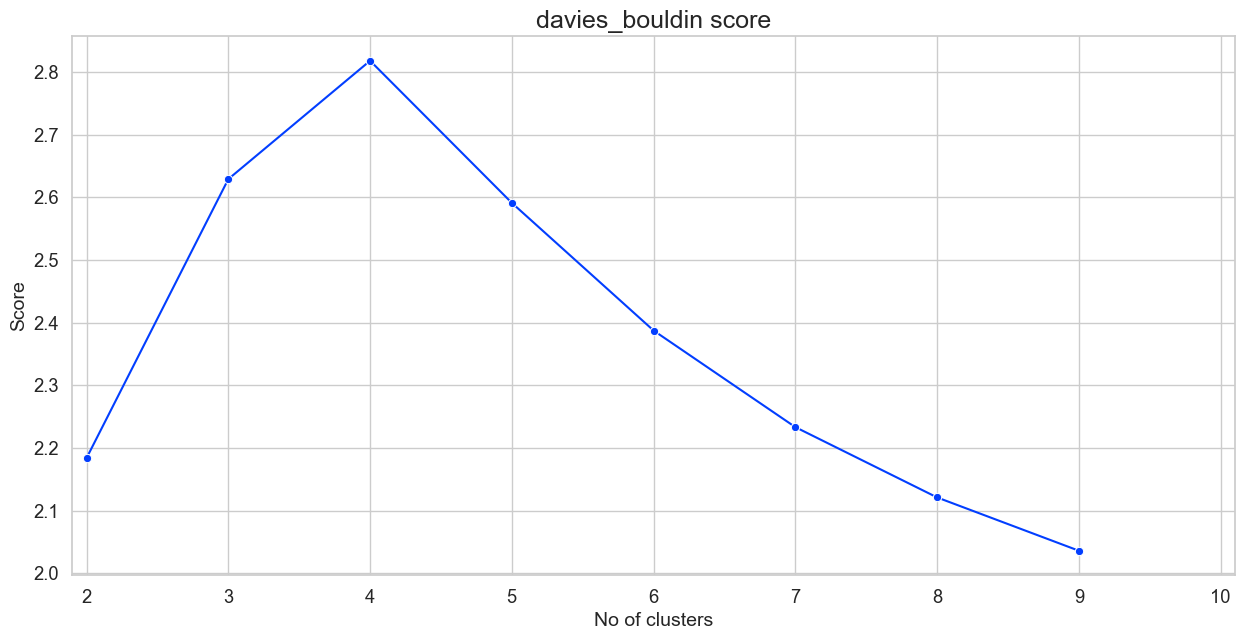

In [26]:
model =AgglomerativeClustering(linkage='ward',compute_full_tree=True)
ideal_model=Hiearchical_clustering(model,10,scaled_data)

In [27]:
model =AgglomerativeClustering(linkage='ward',compute_full_tree=True)
model.set_params(n_clusters=3)

clusters=model.fit_predict(scaled_data)
# Add the cluster number to the original scaled data
X_clustered = pd.DataFrame(scaled_data, index=df2.index, columns=df2.columns)
X_clustered["cluster"] = clusters
means =  X_clustered.groupby(by="cluster").mean()
best_centroids=means.reset_index().drop(['cluster'],axis=1).to_numpy()

                    ****************************                      
            Visualization of Boxplot               


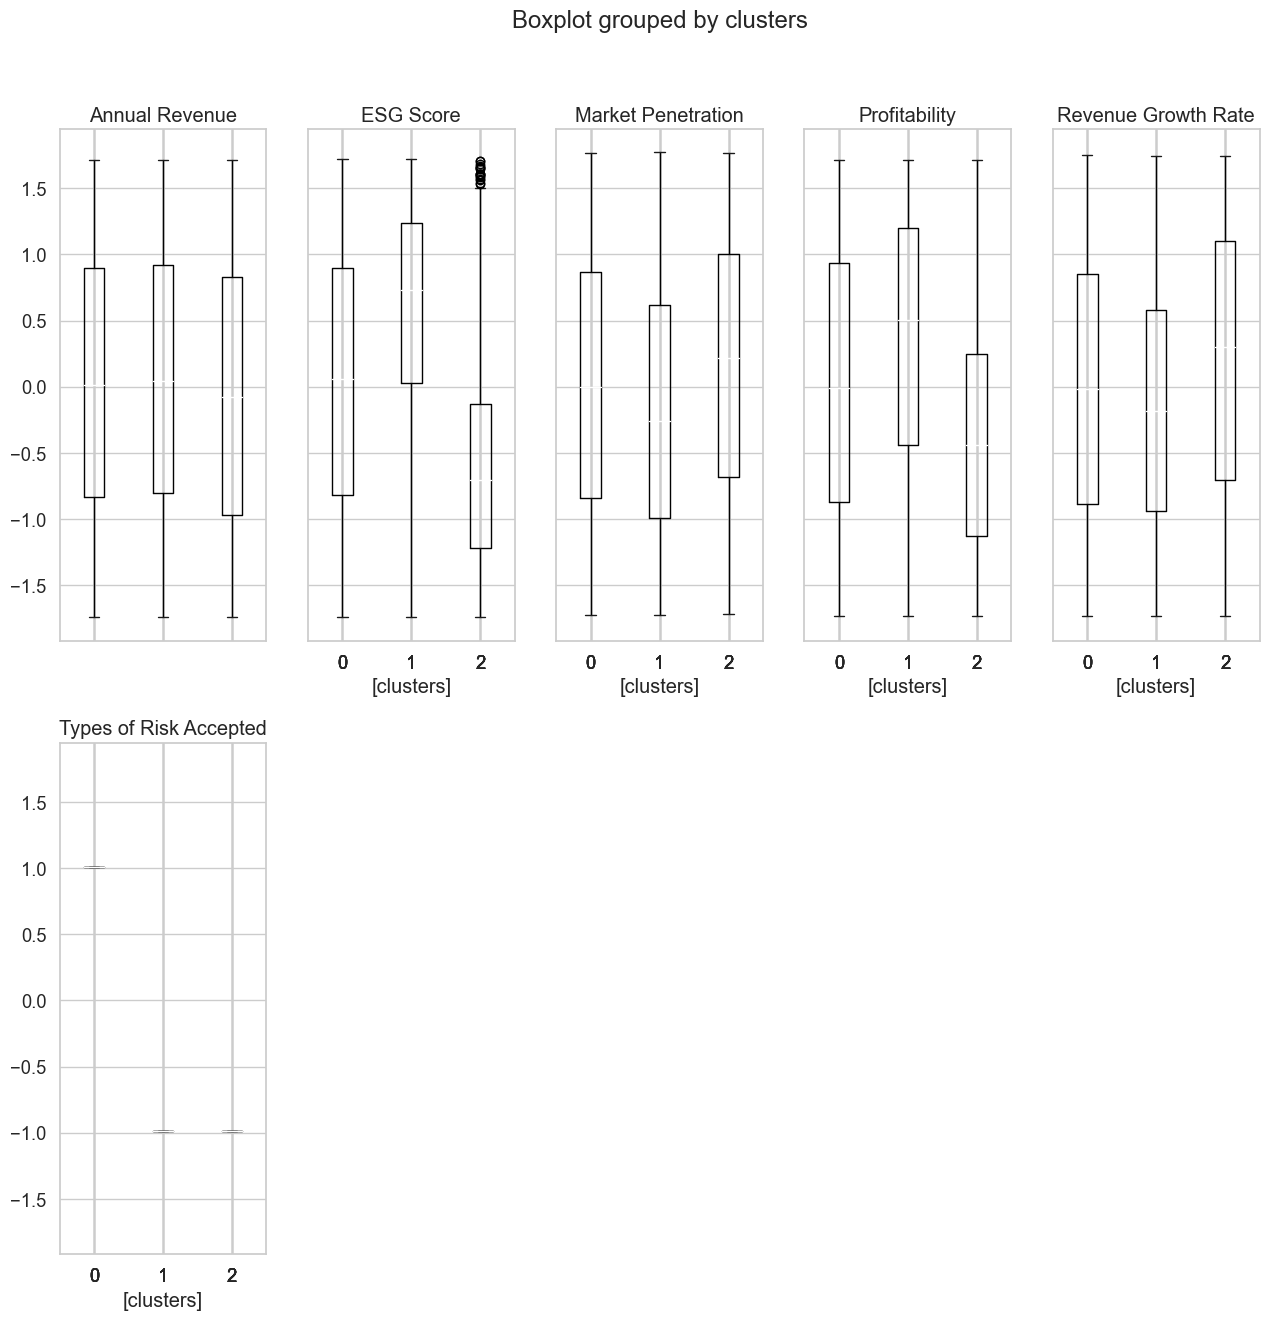

                    ****************************                      
            Visualization of Violin               


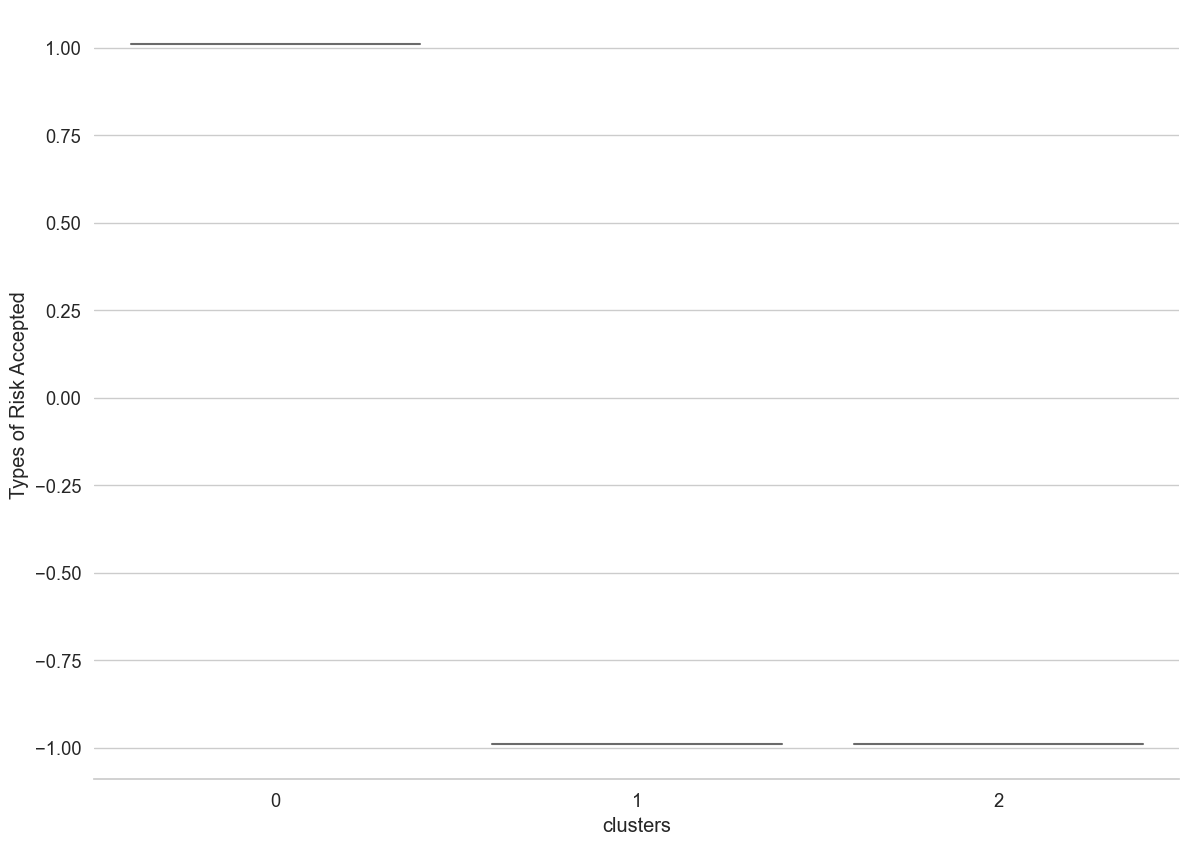

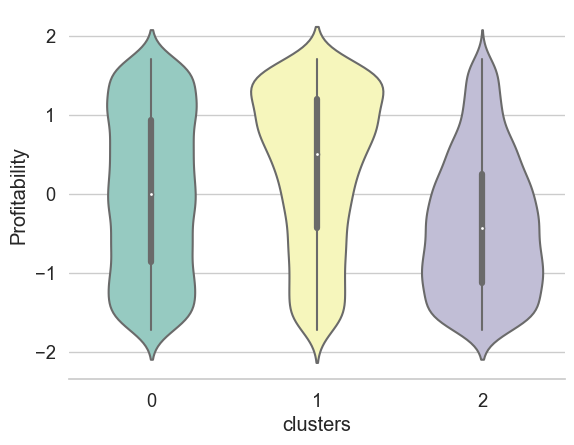

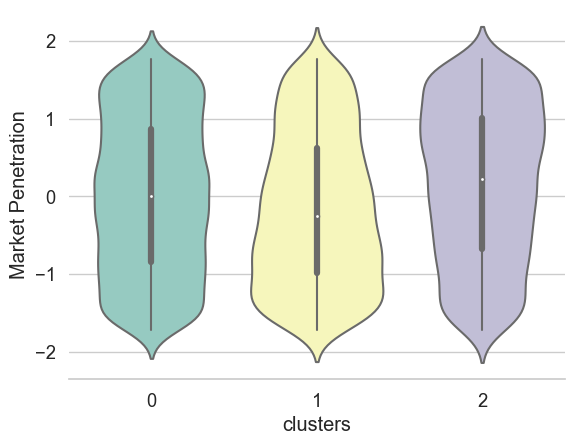

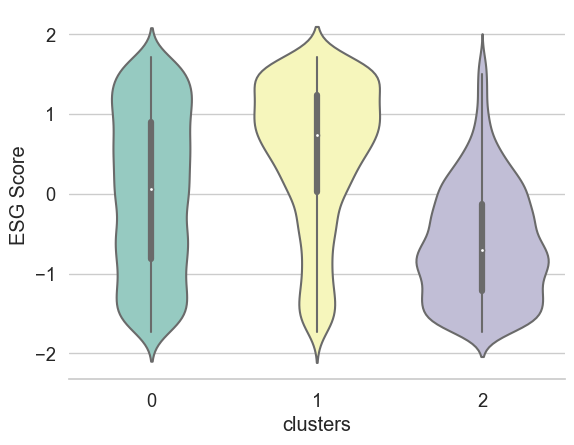

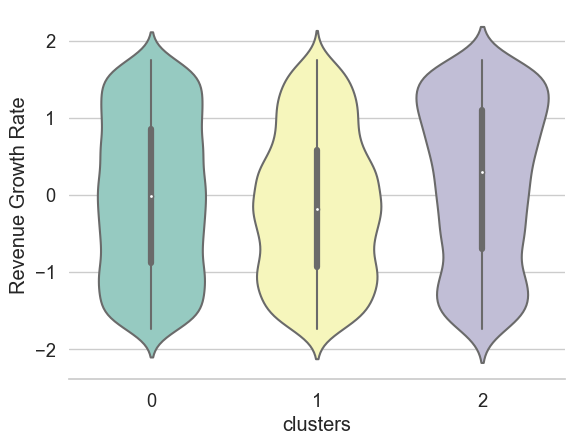

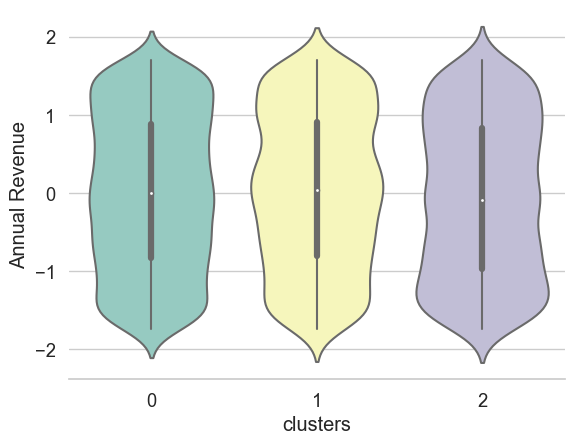

            Visualization of PCA Projection               
Variance Explained by PCA Projection = 0.5085494470599555


<Figure size 1500x700 with 0 Axes>

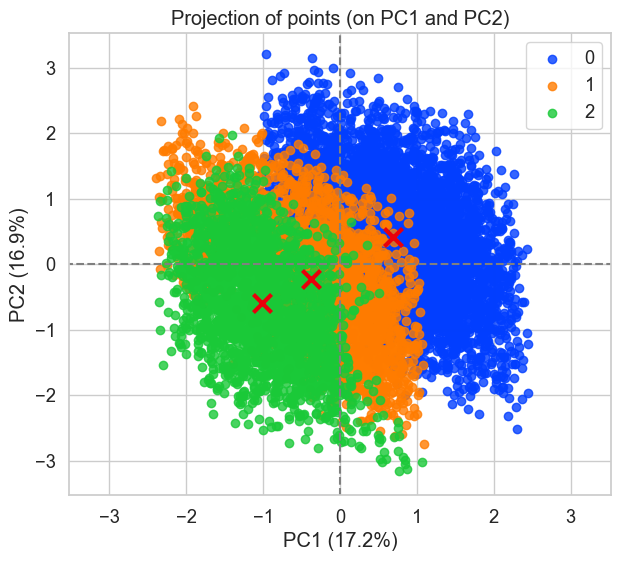

<Figure size 1500x700 with 0 Axes>

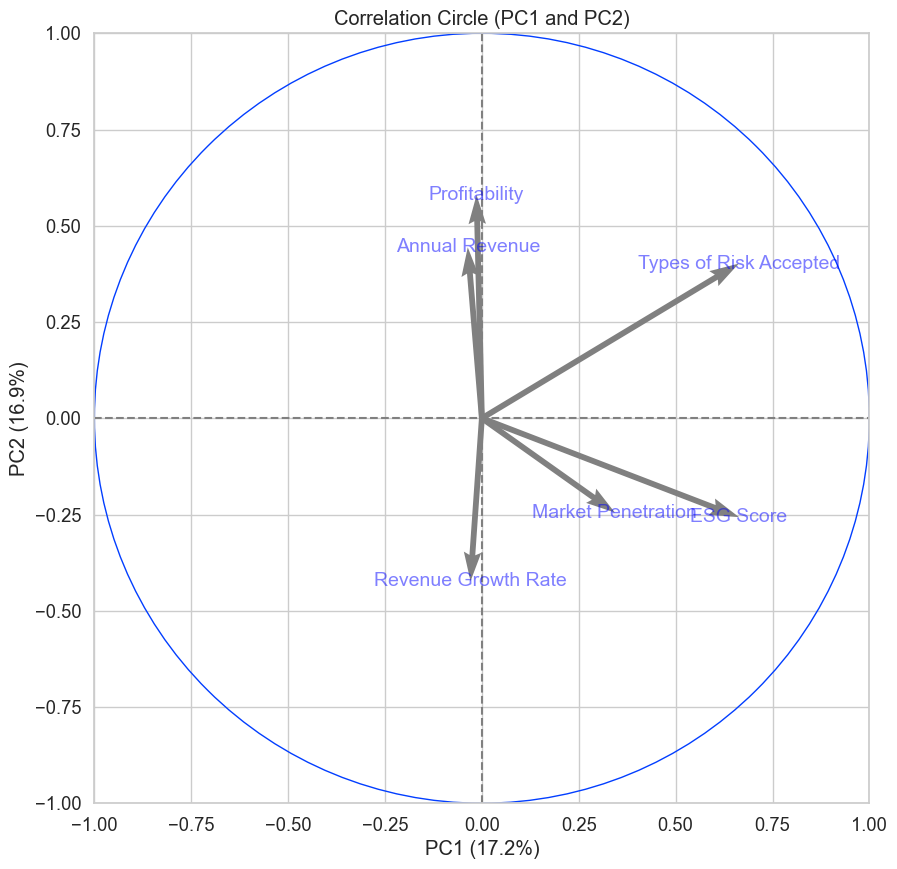

                    ****************************                      


<Figure size 1500x700 with 0 Axes>

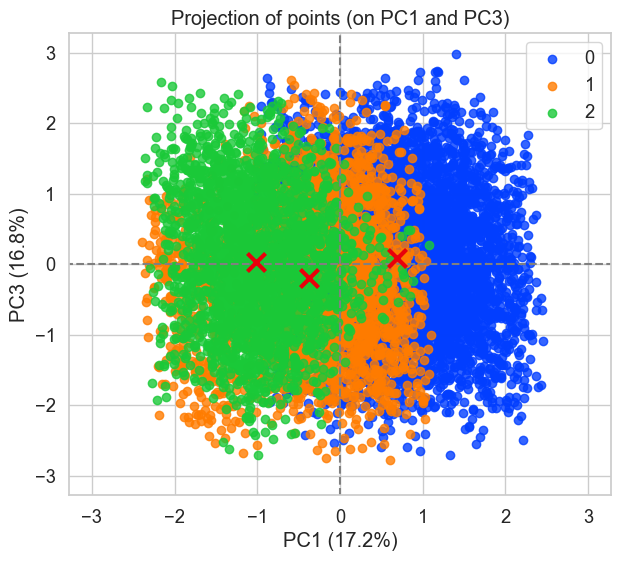

<Figure size 1500x700 with 0 Axes>

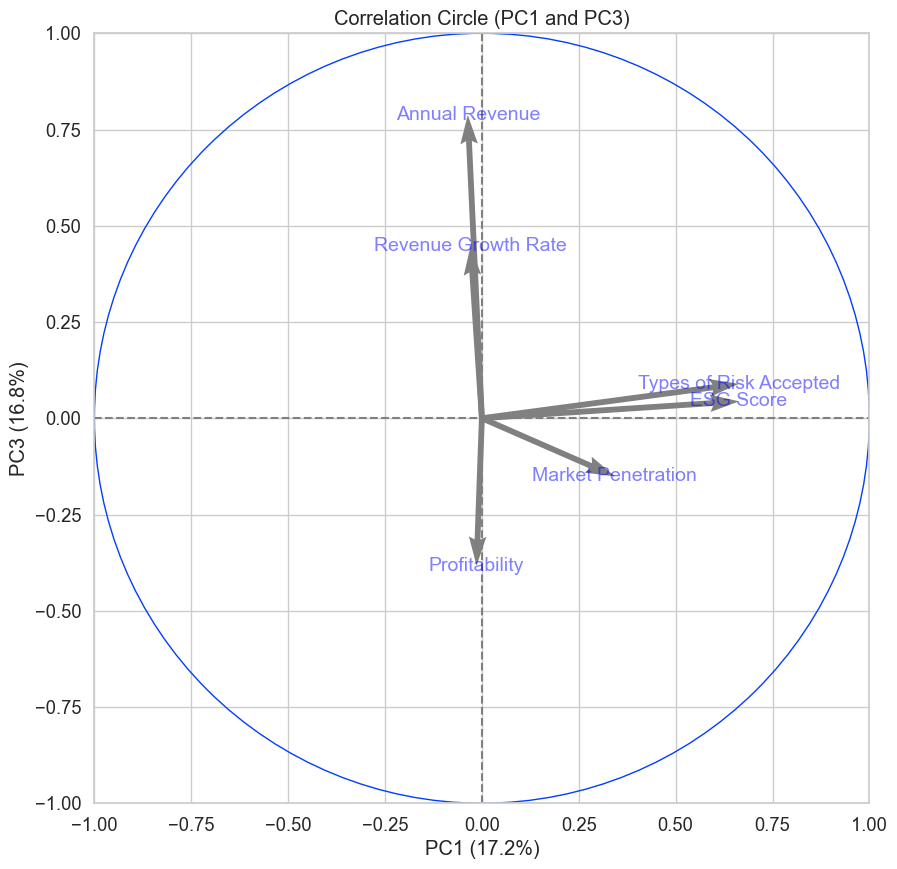

                    ****************************                      


<Figure size 1500x700 with 0 Axes>

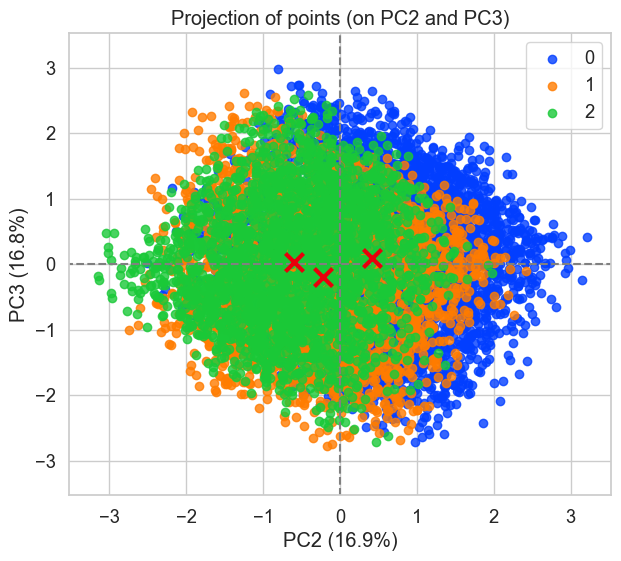

<Figure size 1500x700 with 0 Axes>

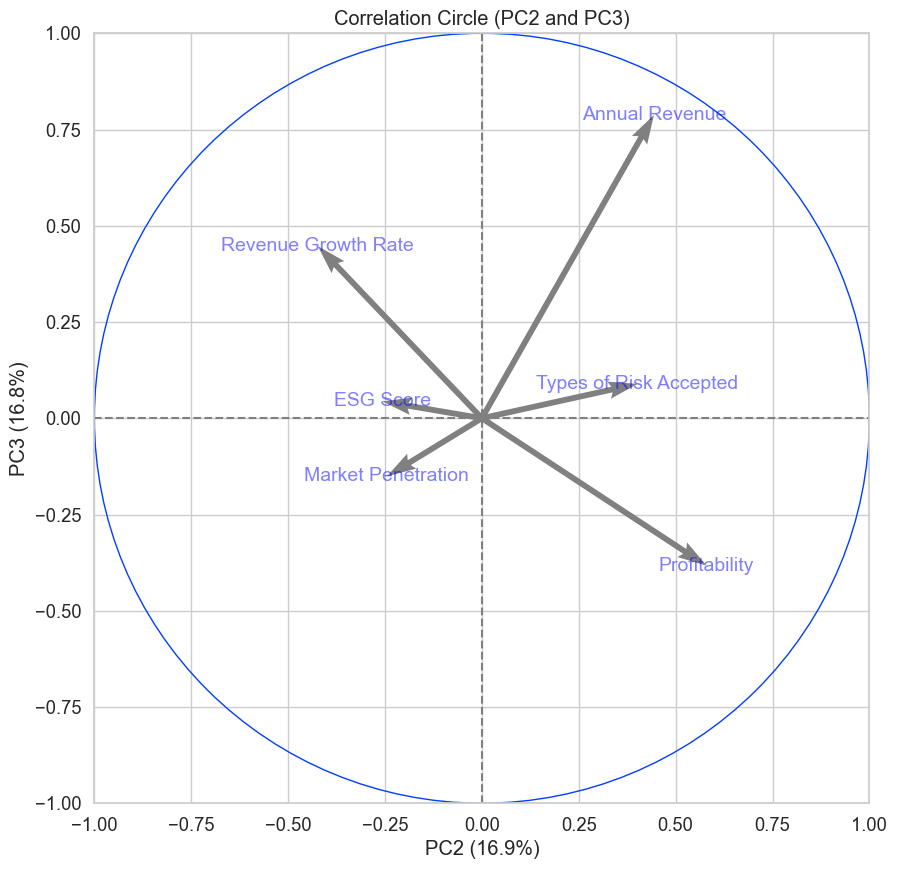

            Visualization of Coordination Chart               


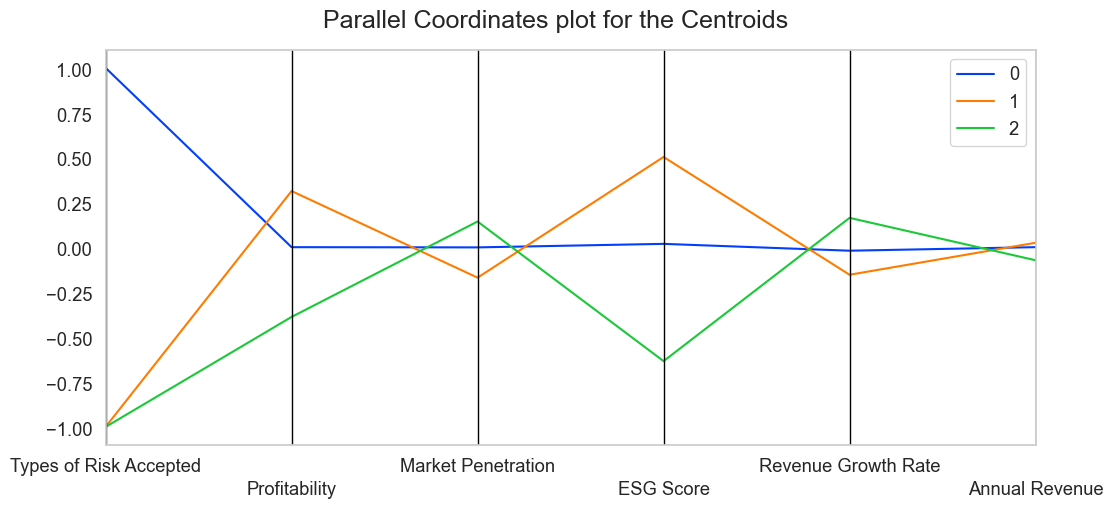

In [28]:
Visualization_results(scaled_data,df2,best_centroids,clusters)

## Observations from the boxplot chart:

   * The feature set related to financial profitability, including ESG Score, Profitability, Revenue Growth Rate, and Type of Risk Accepted, exhibits noticeable variance across clusters.
   * Cluster 1 demonstrates a higher mean ESG Score compared to Cluster 2, suggesting that agencies in Cluster 1 have stronger environmental, social, and governance practices.
   * In terms of Profitability, Cluster 2 shows a significantly lower score compared to the other clusters, indicating potential financial challenges or inefficiencies.
   * Cluster 1 exhibits a higher mean Revenue Growth Rate, suggesting that agencies in this cluster are experiencing more rapid revenue growth compared to the other clusters.
   * Regarding the Type of Risk Accepted, it appears that Cluster 1 tends to accept selective types of risk, while Cluster 2 may have a broader or more comprehensive approach to risk acceptance.

## Observations from the PCA projection and circle of correlation:

   * ESG Score demonstrates a strong correlation with Dim1 of the PCA projection, indicating its significance in distinguishing clusters. Cluster 0 tends to be represented on the positively skewed side of the distribution, suggesting higher ESG Scores for agencies in this cluster.
   * Profitability and Annual Revenue correlate strongly with Dim2 of the PCA projection. In descending order, Cluster 0, Cluster 1, and Cluster 2 are positioned along the Dim2 axis, indicating variations in profitability and revenue among clusters.
   * While Annual Revenue shows a high correlation with Dim3, there is no apparent difference in the scattering plot, suggesting that Annual Revenue may not significantly contribute to the differentiation of clusters in the PCA projection.



## Observations from the coordination plot:

   * Cluster 1 tends to have higher Profitability and ESG Score centroids compared to the other clusters, indicating stronger financial performance and environmental, social, and governance practices.
   * Cluster 2 demonstrates slightly higher centroids for Market Penetration and lower centroids for ESG Score, suggesting a focus on expanding market presence with potentially lower adherence to ESG principles. Additionally, Cluster 2 exhibits higher centroids for Revenue Growth, indicating a faster growth rate in revenue.
   * Cluster 1 consistently represents a moderate choice between both clusters, reflecting a balanced profile in terms of financial performance and ESG practices.

Cluster : 2  In process....
Cluster : 3  In process....
Cluster : 4  In process....
Cluster : 5  In process....
Cluster : 6  In process....


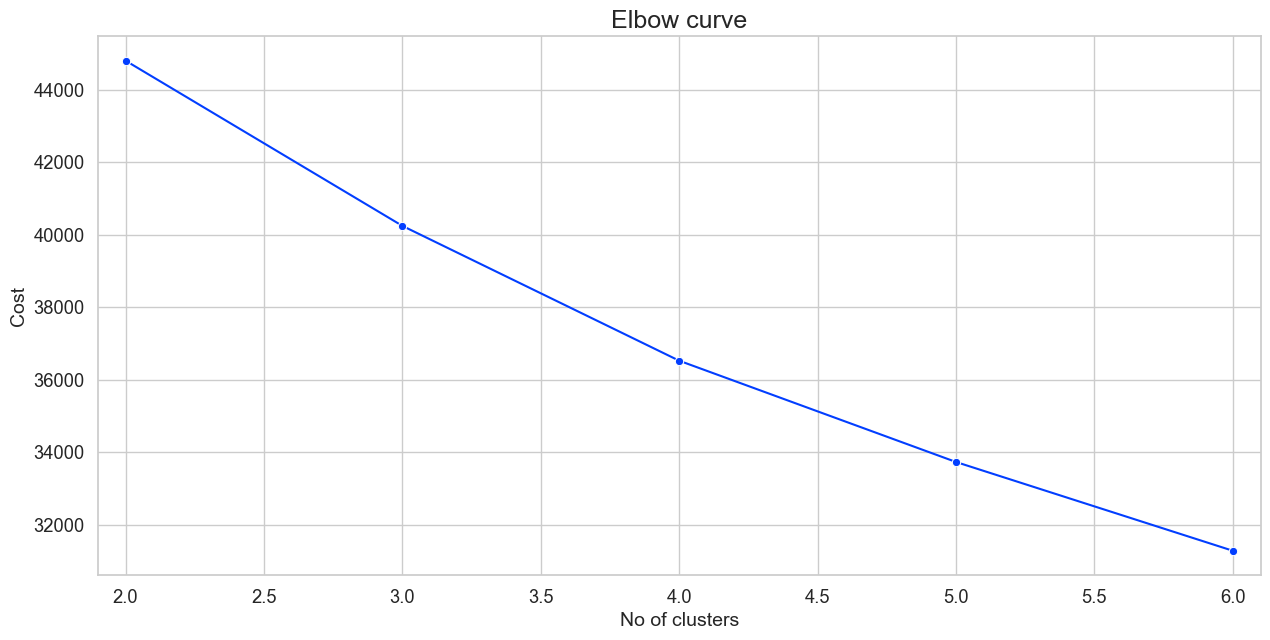

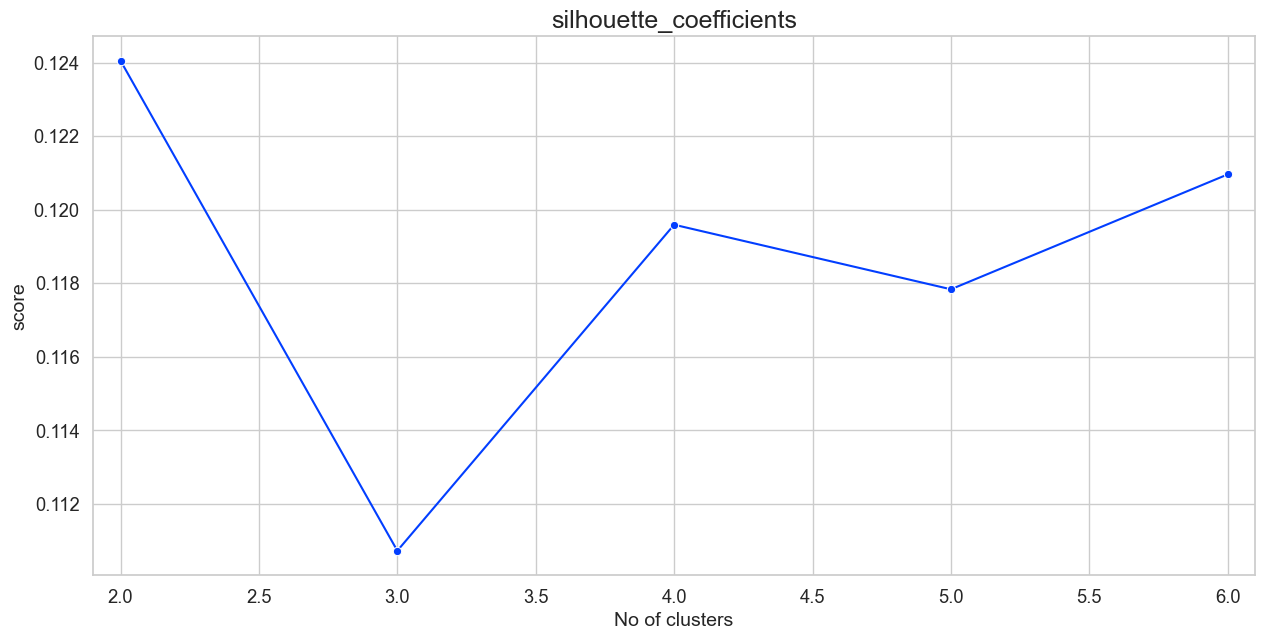

In [29]:
KPrototypes_clustering(2,6,scaled_data,[0])

In [30]:
best_centroids

array([[ 1.00984849,  0.01100399,  0.00983015,  0.02946374, -0.00866793,
         0.01109931],
       [-0.99024755,  0.32361367, -0.15877817,  0.51345933, -0.14263408,
         0.03561326],
       [-0.99024755, -0.37755169,  0.15393025, -0.62372137,  0.17425728,
        -0.06188012]])

In [17]:
test_model = KPrototypes(n_clusters=3, init='Huang', random_state=42,verbose=1)
clusters=test_model.fit_predict(scaled_data, categorical=[0])
best_centroids=test_model.cluster_centroids_

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 1447, ncost: 41137.49319856833
Run: 1, iteration: 2/100, moves: 696, ncost: 40966.761566145666
Run: 1, iteration: 3/100, moves: 495, ncost: 40832.06366257126
Run: 1, iteration: 4/100, moves: 422, ncost: 40741.69000642925
Run: 1, iteration: 5/100, moves: 324, ncost: 40692.51040340406
Run: 1, iteration: 6/100, moves: 251, ncost: 40656.88159541302
Run: 1, iteration: 7/100, moves: 304, ncost: 40598.93847103132
Run: 1, iteration: 8/100, moves: 309, ncost: 40538.80499604326
Run: 1, iteration: 9/100, moves: 291, ncost: 40484.20800741223
Run: 1, iteration: 10/100, moves: 237, ncost: 40458.796701139494
Run: 1, iteration: 11/100, moves: 170, ncost: 40444.55925452783
Run: 1, iteration: 12/100, moves: 114, ncost: 40436.62298113239
Run: 1, iteration: 13/100, moves: 80, ncost: 40432.826080821804
Run: 1, iteration: 14/100, moves: 64, ncost: 40430.43853865393
Run: 1, iteration: 15/100, move

Run: 6, iteration: 12/100, moves: 64, ncost: 40315.023196101036
Run: 6, iteration: 13/100, moves: 51, ncost: 40313.3533825152
Run: 6, iteration: 14/100, moves: 48, ncost: 40311.397776316786
Run: 6, iteration: 15/100, moves: 54, ncost: 40309.92271812143
Run: 6, iteration: 16/100, moves: 32, ncost: 40309.34799836586
Run: 6, iteration: 17/100, moves: 20, ncost: 40309.016957647174
Run: 6, iteration: 18/100, moves: 27, ncost: 40308.445674534334
Run: 6, iteration: 19/100, moves: 22, ncost: 40307.88205119228
Run: 6, iteration: 20/100, moves: 40, ncost: 40306.81395146241
Run: 6, iteration: 21/100, moves: 33, ncost: 40306.36052306798
Run: 6, iteration: 22/100, moves: 11, ncost: 40306.264535720344
Run: 6, iteration: 23/100, moves: 10, ncost: 40306.17183308306
Run: 6, iteration: 24/100, moves: 6, ncost: 40306.114249101
Run: 6, iteration: 25/100, moves: 7, ncost: 40306.06166893617
Run: 6, iteration: 26/100, moves: 11, ncost: 40305.99098362766
Run: 6, iteration: 27/100, moves: 5, ncost: 40305.94544

                    ****************************                      
            Visualization of Boxplot               


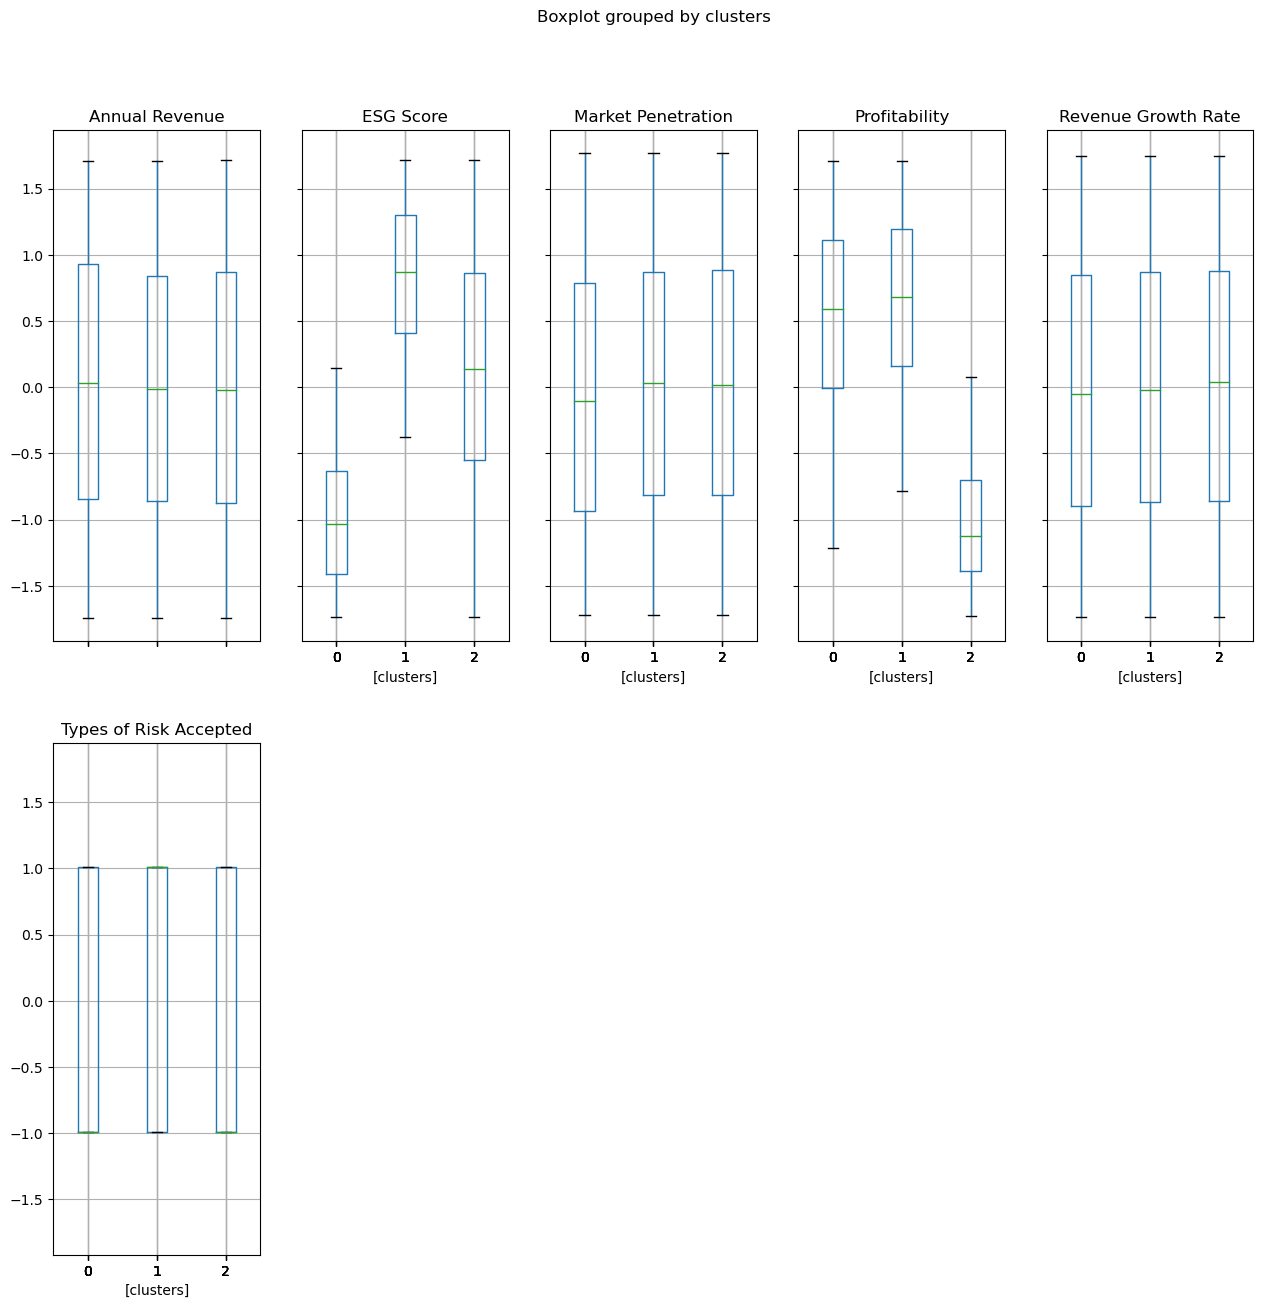

                    ****************************                      
            Visualization of Violin               


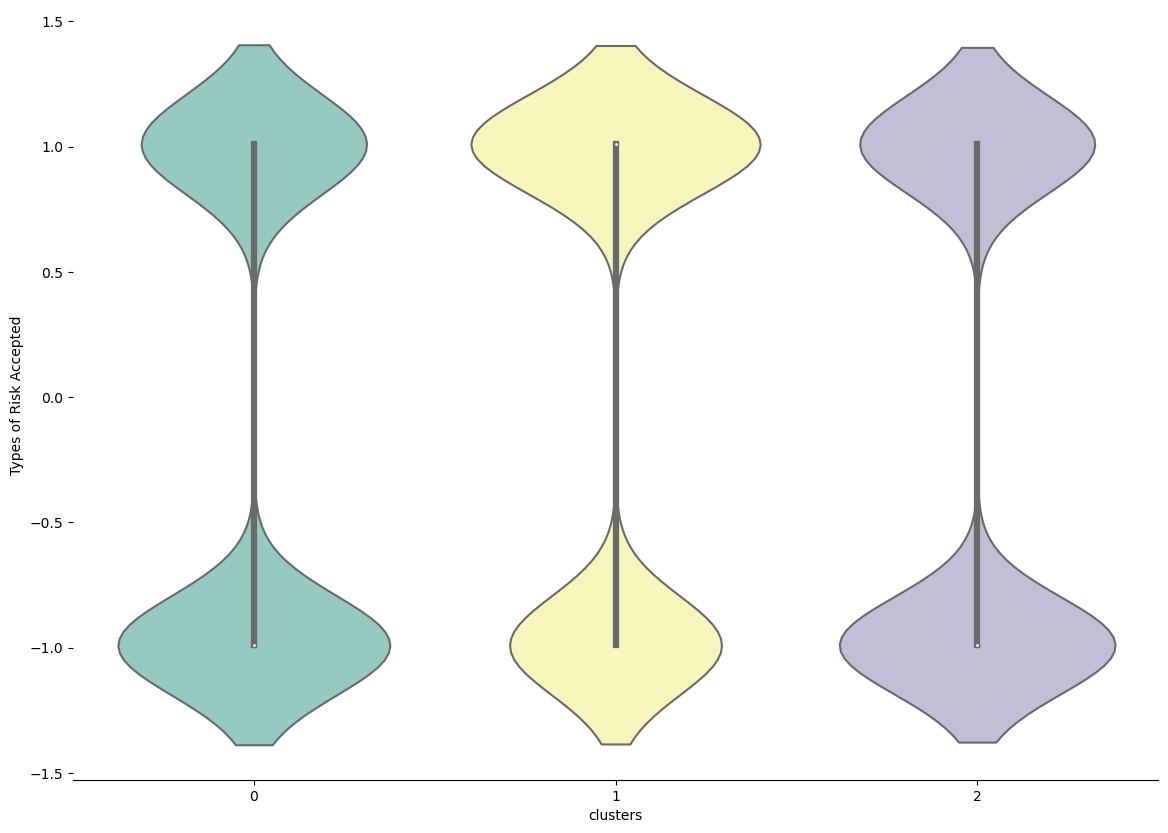

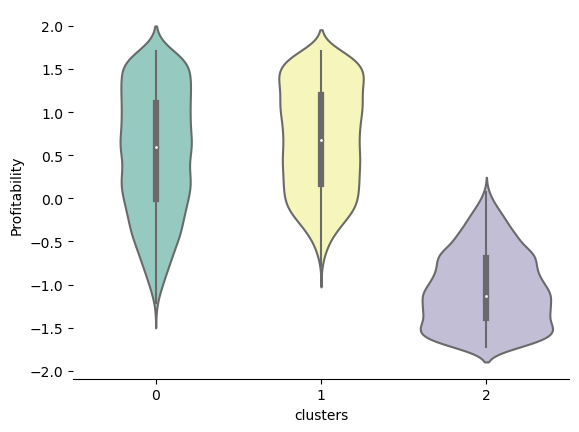

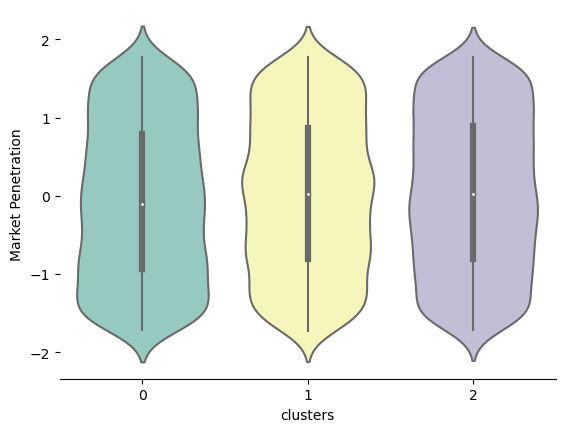

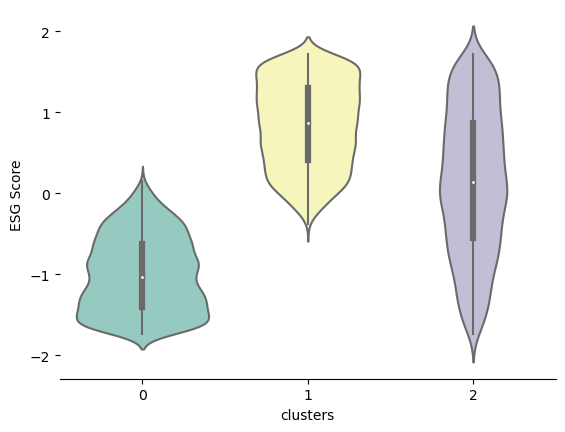

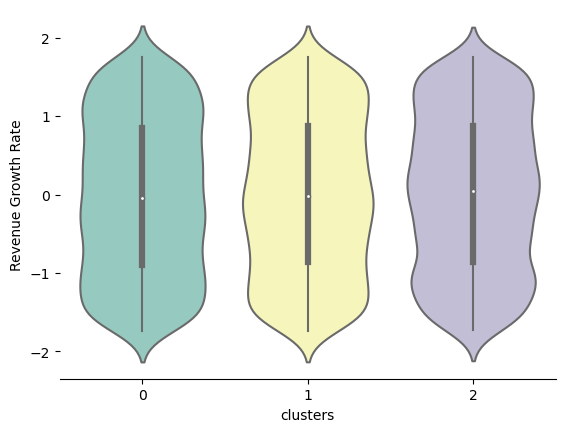

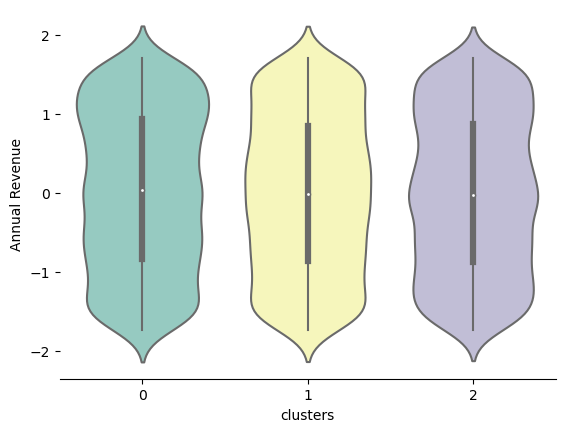

            Visualization of PCA Projection               
Variance Explained by PCA Projection = 0.5085494470599562


<Figure size 1500x700 with 0 Axes>

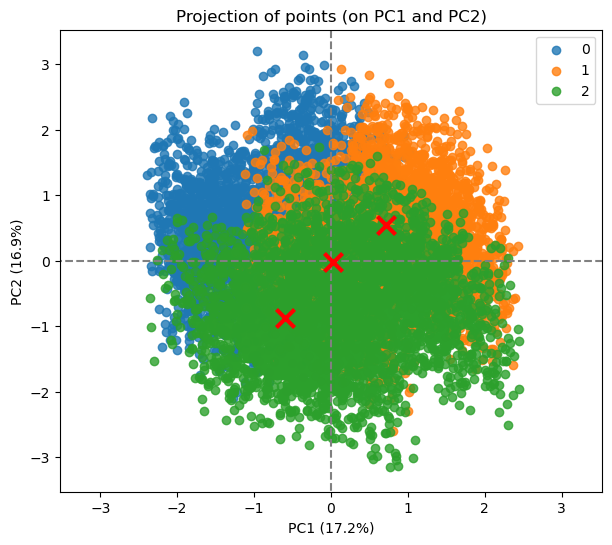

<Figure size 1500x700 with 0 Axes>

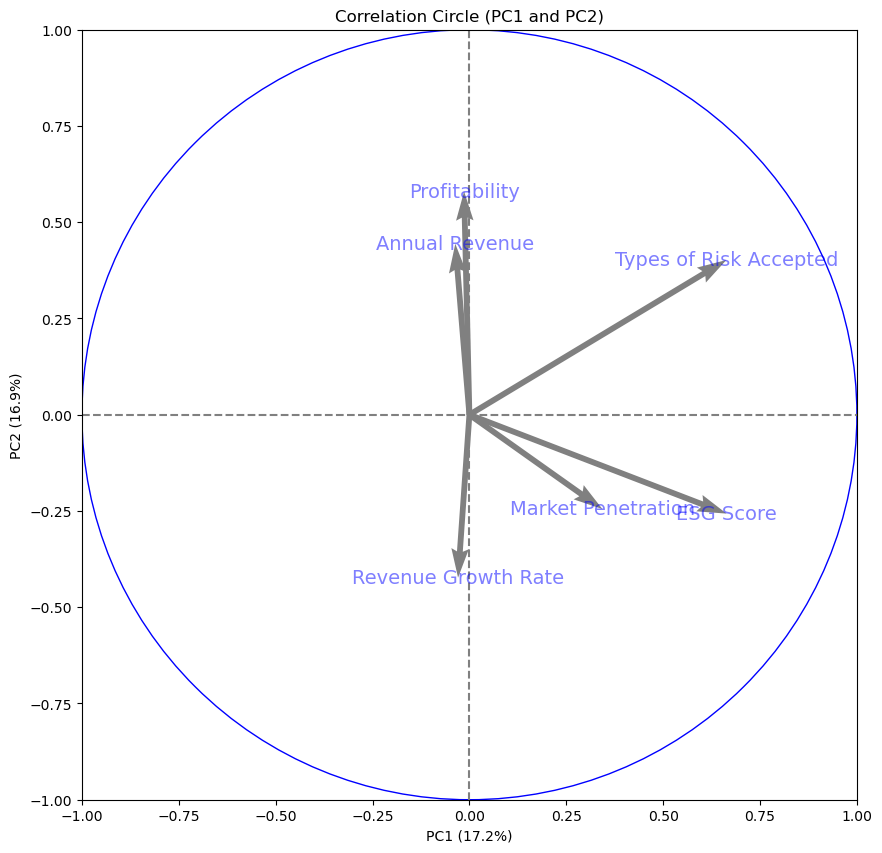

                    ****************************                      


<Figure size 1500x700 with 0 Axes>

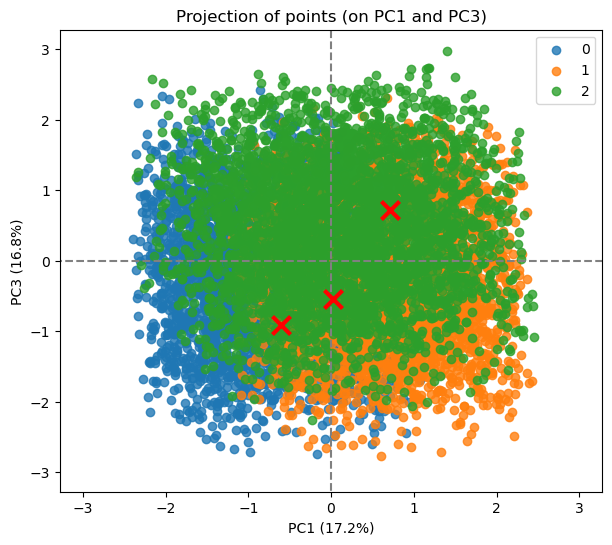

<Figure size 1500x700 with 0 Axes>

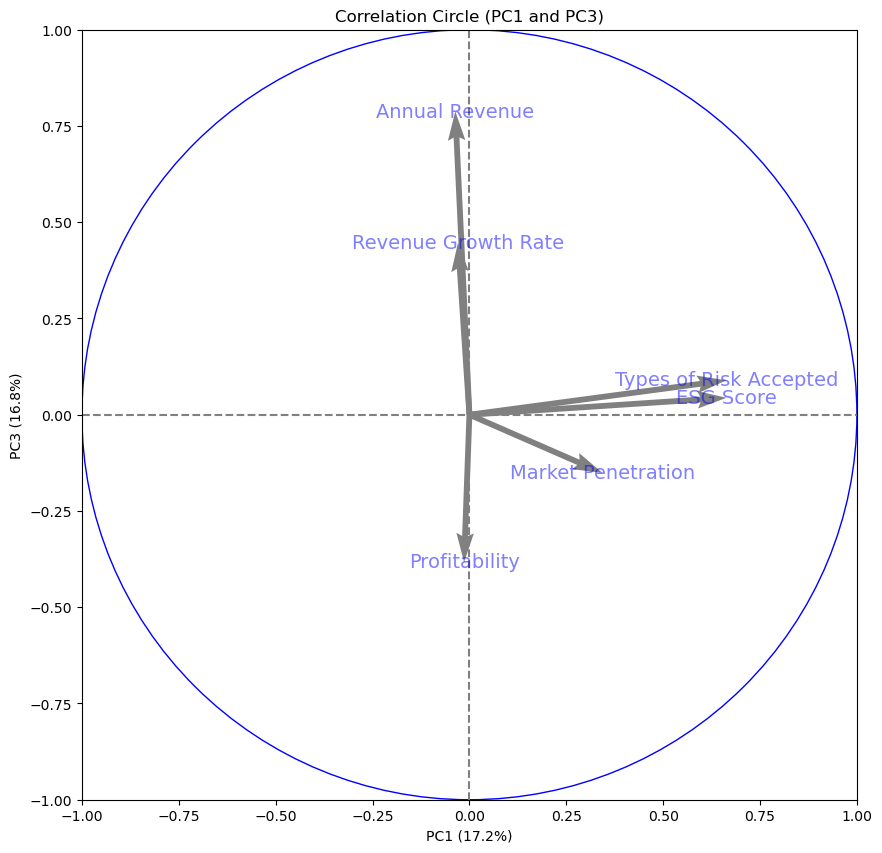

                    ****************************                      


<Figure size 1500x700 with 0 Axes>

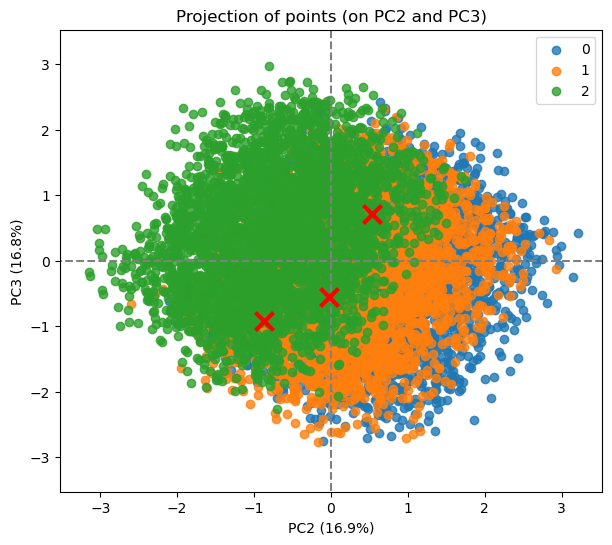

<Figure size 1500x700 with 0 Axes>

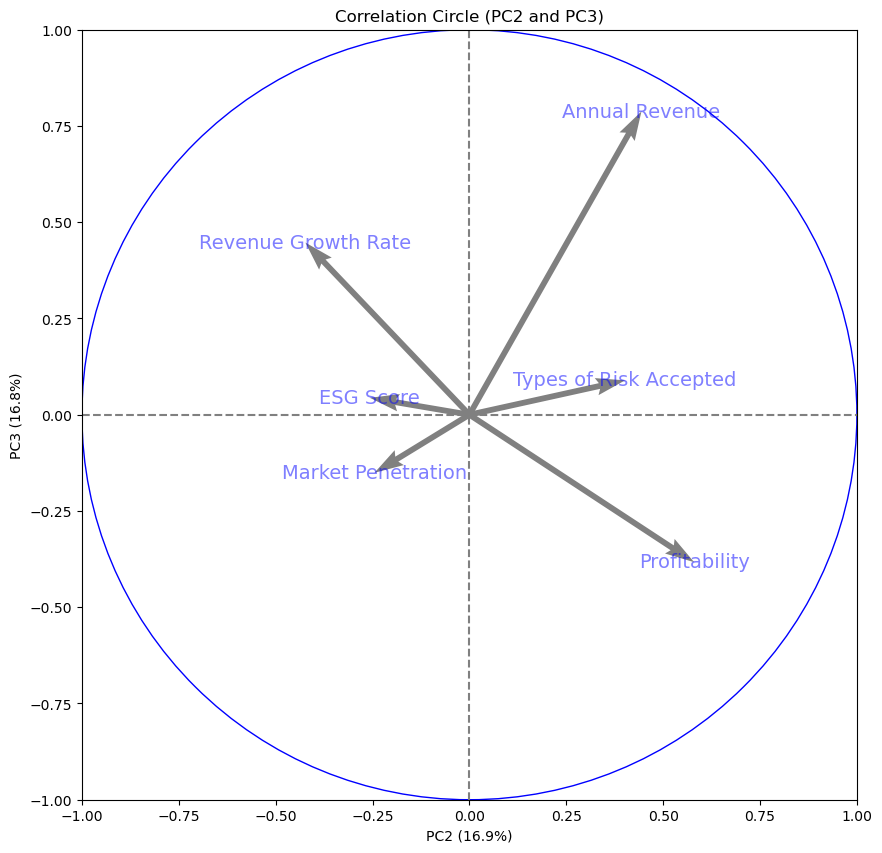

            Visualization of Coordination Chart               


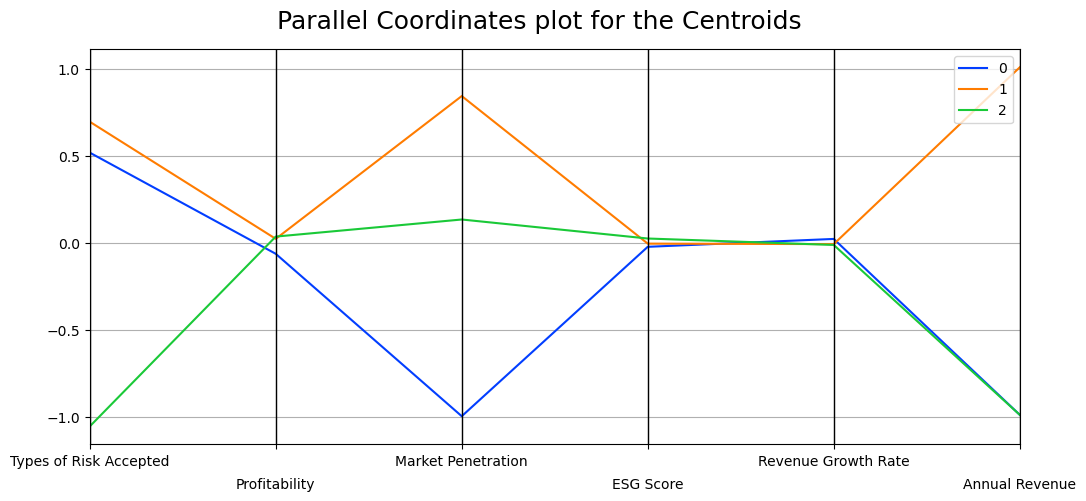

In [18]:
Visualization_results(scaled_data,df2,best_centroids,clusters)

## Observations from the boxplot chart:

   * The K-Prototypes clustering results reveal significant differences among clusters in specific features, including ESG Score, Profitability, Type of Risk Accepted, and to a lesser extent, Annual Revenue.
   * ESG Score exhibits a notable disparity, with Cluster 0 scoring significantly lower compared to the other clusters, suggesting potential differences in environmental, social, and governance practices among clusters.
   * In terms of Market Penetration, Cluster 0 demonstrates the lowest mean compared to the other clusters, indicating variations in market presence strategies.
   * Profitability shows discernible differences among clusters, with Cluster 2 displaying a lower mean compared to the others, highlighting potential differences in financial performance and efficiency.
   
## Observations from the PCA projection and circle of correlation:

   * Profitability demonstrates a higher correlation with Dim2, suggesting its significance in distinguishing clusters based on financial performance.
   * Market Penetration exhibits correlation with Dim1, indicating its role in differentiating clusters based on market presence strategies.
   * Annual Revenue shows high correlation with Dim3, suggesting its importance in clustering based on revenue metrics.
   * When plotting data on Dim1 and Dim2, Clusters 0 and 1 appear to have higher Profitability compared to the other clusters.
   * When plotting data on Dim2 and Dim3, Cluster 2 seems to have higher Annual Revenue and Revenue Growth Rate compared to the other clusters.

## Observations from the coordination plot:

   * Type of Risk Accepted shows that Clusters 0 and 1 tend to accept selective risks, suggesting a more cautious approach to risk management compared to Cluster 2.
   * In terms of Profitability, Cluster 0 appears to have less market penetration potential compared to Clusters 1 and 2, indicating potential differences in financial performance and efficiency.
   * ESG Score reveals that Cluster 2 scores higher compared to Clusters 1 and 0, indicating stronger environmental, social, and governance practices among agencies in Cluster 2.
   * Annual Revenue demonstrates that Cluster 1 scores significantly higher than Clusters 0 and 2, suggesting variations in revenue generation capabilities among clusters.




## Comparative Analysis of Clustering Methods

   * After careful consideration and comparison between the two clustering methods, we have decided to choose the results from the K-Prototypes clustering analysis. The K-Prototypes method has demonstrated its superiority in providing a more coherent clustering solution that aligns with our initial proposals and fulfills the requirements for our clustering business requirements, particularly for the recommendation system. By incorporating both numerical and categorical features, the K-Prototypes clustering analysis has offered a more accurate representation of the underlying patterns in the data and has provided actionable insights into the segmentation of insurance agencies based on key financial metrics and operational characteristics. Therefore, we will proceed with the clustering results from the K-Prototypes method for further analysis and decision-making.

In [19]:
df2['Financial_dynamics']=clusters

## Clusters Interpretation :

###  Cluster 0 :

   * Stable and Conservative: Agencies in Cluster 0 demonstrate stability and a conservative approach to risk management, which can be attractive to risk-averse customers.
   * Efficient Cost Management: Their efficient cost management practices contribute to stable profitability and long-term sustainability.
   * Potential Stagnation: Over-reliance on conservative strategies may lead to stagnation and missed opportunities for innovation and market expansion.
   
### Cluster 1 :

   * Balanced Performance: Cluster 1 agencies strike a balance between risk management and revenue generation, appealing to a broad range of customers.
   * Lack of Competitive Edge: However, their moderate performance may result in a lack of competitive differentiation, making it challenging to stand out in the market.
   * Versatility and Reliability: Their moderate risk profile and solid revenue streams make them versatile and reliable partners.

### Cluster 2 :

   * Aggressive Growth Potential: Agencies in Cluster 2 have a high growth potential and aggressive growth strategy, capitalizing on revenue opportunities and market expansion.
   * Risk of Overextension: Pursuing rapid growth may result in overextension and operational challenges, especially if not accompanied by effective risk management and scalability strategies.
   * Higher Risk Exposure: However, their aggressive growth strategy may expose them to higher risks, potentially leading to volatility and instability.


### Reordering  clusters 

In [20]:
F_solidaty_mapping={0:2,2:0,1:1}
F_dynamics_mapping={1:2,2:1,0:0}

df1['Financial_solidity']=df1['Financial_solidity'].map(F_solidaty_mapping)

df2['Financial_dynamics']=df2['Financial_dynamics'].map(F_dynamics_mapping)


In [24]:
df1.to_csv('features_engineerd/F_solidity.csv',index=False)
df2.to_csv('features_engineerd/F_dynamics.csv',index=False)